<a href="https://colab.research.google.com/github/UzunDemir/12_Time_Series/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_TBATS_PROPHET_ARIMA_ipynb_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tbats

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 44.0/44.0 kB 2.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.1/2.1 MB 44.4 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
## make plots bigger
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7

# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# models
from tbats import TBATS
from prophet import Prophet
from pmdarima import auto_arima


def plot_results(y_to_train,
                 y_to_test, y_forecast,
                 plot_conf_int=True,
                 left_bound=None, right_bound=None):

    plt.plot(y_to_train, label='train')
    plt.plot(y_to_test, label='test')
    plt.plot(y_to_test.index, y_forecast, label='prediction')

    if plot_conf_int:
        plt.fill_between(y_to_test.index,
                         left_bound, right_bound,
                         alpha=0.23, color='grey',
                         label='intervals')
    plt.legend()
    plt.show()

## Prophet, SARIMAX, TBATS ‚Äî –º–æ–¥–µ–ª–∏ –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤

### 1. –ó–∞–¥–∞—á–∞

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º [–¥–∞—Ç–∞—Å–µ—Ç](https://www.kaggle.com/c/demand-forecasting-kernels-only/overview) —Å kaggle —Å —Å–æ—Ä–µ–≤–Ω–æ–≤–∞–Ω–∏—è –ø–æ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—é —Å–ø—Ä–æ—Å–∞ –Ω–∞ —Ç–æ–≤–∞—Ä—ã.

In [5]:
data = pd.read_csv('train.csv', parse_dates=['date'])
data.head()

date  store  item  sales
0 2013-01-01      1     1     13
1 2013-01-02      1     1     11
2 2013-01-03      1     1     14
3 2013-01-04      1     1     13
4 2013-01-05      1     1     10

–ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –Ω–∞–ª–∏—á–∏–µ –¥–∞–Ω–Ω—ã—Ö: –ü–æ—Å–ª–µ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö —Ä–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è –ø—Ä–æ–≤–µ—Ä—è—Ç—å, –æ—Å—Ç–∞–ª–∏—Å—å –ª–∏ —Å—Ç—Ä–æ–∫–∏ –≤ DataFrame. –ï—Å–ª–∏ –Ω–µ—Ç, –º–æ–∂–Ω–æ –æ–±—Ä–∞–±–æ—Ç–∞—Ç—å —Å–ª—É—á–∞–π, –∫–æ–≥–¥–∞ –¥–∞–Ω–Ω—ã—Ö –Ω–µ –æ—Å—Ç–∞–ª–æ—Å—å.

In [6]:
if data.empty:
    print("–ù–µ—Ç –¥–∞–Ω–Ω—ã—Ö –¥–ª—è —É–∫–∞–∑–∞–Ω–Ω—ã—Ö store –∏ item.")


In [7]:
store, item = 1,1
data = data[(data['store'] == store) & (data['item'] == item)]
data = data.set_index('date')
data = data['sales']

In [8]:
data

date
2013-01-01    13
2013-01-02    11
2013-01-03    14
2013-01-04    13
2013-01-05    10
              ..
2017-12-27    14
2017-12-28    19
2017-12-29    15
2017-12-30    27
2017-12-31    23
Name: sales, Length: 1826, dtype: int64

### 2. –î–∞–Ω–Ω—ã–µ
–†–∞–∑–¥–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ train –∏ test. test ‚Äî –¥–∞–Ω–Ω—ã–µ –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥.

In [9]:
test_size = 365
data_train = data.iloc[: -test_size]
data_test  = data.iloc[-test_size:]

–í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ.

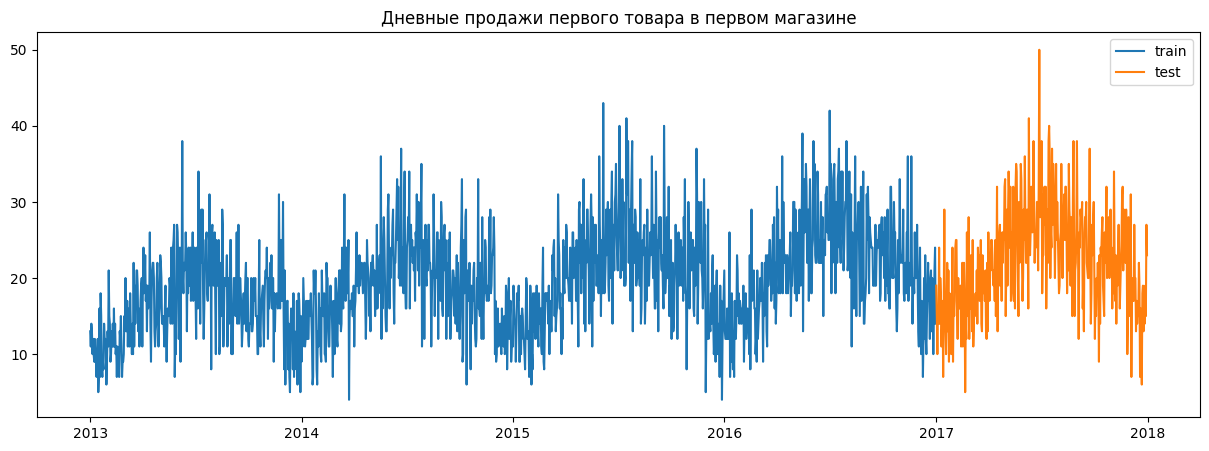

In [10]:
plt.figure(figsize=(15, 5))

plt.title('–î–Ω–µ–≤–Ω—ã–µ –ø—Ä–æ–¥–∞–∂–∏ –ø–µ—Ä–≤–æ–≥–æ —Ç–æ–≤–∞—Ä–∞ –≤ –ø–µ—Ä–≤–æ–º –º–∞–≥–∞–∑–∏–Ω–µ')

plt.plot(data_train, label='train')
plt.plot(data_test, label='test')
plt.legend()

–ù–µ–∫–æ—Ç–æ—Ä–∞—è –Ω–µ–¥–µ–ª—å–Ω–∞—è —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å –µ—Å—Ç—å.

### 3. –ú–µ—Ç—Ä–∏–∫–∏
–ó–∞–¥–∞–¥–∏–º –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–µ–π: MSE, MAE, MAPE. –ó–∞–¥–∞–¥–∏–º —Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä–∞—è –±—É–¥–µ—Ç –≤—ã—á–∏—Å–ª—è—Ç—å –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–µ–π –∏ –∑–∞–ø–∏—Å—ã–≤–∞—Ç—å –∏—Ö –≤ —Ç–∞–±–ª–∏—Ü—É.


- MAPE (Mean Absolute Percentage Error) –ø–æ–º–æ–∂–µ—Ç –æ—Ü–µ–Ω–∏—Ç—å, –Ω–∞—Å–∫–æ–ª—å–∫–æ –±–ª–∏–∑–∫–∏ –ø—Ä–æ–≥–Ω–æ–∑—ã –∫ —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏–º –∑–Ω–∞—á–µ–Ω–∏—è–º –≤ –ø—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–º —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–∏.
- 	MSE (Mean Squared Error) ‚Äî –¥–ª—è –∏–∑–º–µ—Ä–µ–Ω–∏—è —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–π –æ—à–∏–±–∫–∏ –º–µ–∂–¥—É –ø—Ä–æ–≥–Ω–æ–∑–∞–º–∏ –∏ —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏. –≠—Ç–æ –ø–æ–º–æ–∂–µ—Ç –ø–æ–Ω—è—Ç—å —Å—Ä–µ–¥–Ω—é—é –æ—à–∏–±–∫—É –ø—Ä–æ–≥–Ω–æ–∑–∞ –≤ –∫–≤–∞–¥—Ä–∞—Ç–µ.
- 	MAE (Mean Absolute Error) ‚Äî –¥–ª—è –æ—Ü–µ–Ω–∫–∏ —Å—Ä–µ–¥–Ω–µ–π –∞–±—Å–æ–ª—é—Ç–Ω–æ–π –æ—à–∏–±–∫–∏ –º–µ–∂–¥—É –ø—Ä–æ–≥–Ω–æ–∑–∞–º–∏ –∏ —Ä–µ–∞–ª—å–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏. –•–æ—Ä–æ—à–æ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ—Ç—Å—è –∏ –ø—Ä–æ—Å—Ç–∞ –≤ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏.

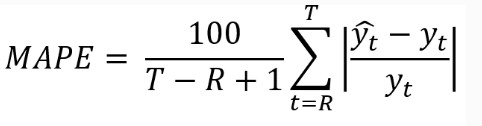

In [11]:
# MAPE
def mean_absolute_percentage_error(y_true, y_pred) -> float:
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [12]:
def add_method_comparison(method: str, y_true, y_forecast, compare_table=None) -> pd.DataFrame:
    result_row = {
        'method': method,
        "MSE": mean_squared_error(y_true=y_true, y_pred=y_forecast),
        "MAE": mean_absolute_error(y_true=y_true, y_pred=y_forecast),
        "MAPE": mean_absolute_percentage_error(y_true=y_true, y_pred=y_forecast)
    }

    if compare_table is None:
        compare_table = pd.DataFrame([result_row])
    else:
        if method in list(compare_table['method']):
            compare_table = compare_table[compare_table['method'] != method]

        compare_table = pd.concat([compare_table, pd.DataFrame([result_row])])
        compare_table.index = np.arange(len(compare_table))
    return compare_table



### 4. Prophet

###4.1. Prophet

Prophet ‚Äî –º–æ–¥–µ–ª—å –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤, —Ä–∞–∑—Ä–∞–±–æ—Ç–∞–Ω–Ω–∞—è ¬´–§–µ–π—Å–±—É–∫–æ–º¬ª*.

*–î–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∫–æ–º–ø–∞–Ω–∏–∏ Meta Platforms Inc., –∫–æ—Ç–æ—Ä–æ–π –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–∏—Ç —É–∫–∞–∑–∞–Ω–∞—è —Å–æ—Ü—Å–µ—Ç—å –∏ —Å–µ—Ä–≤–∏—Å, –ø—Ä–∏–∑–Ω–∞–Ω–∞ —ç–∫—Å—Ç—Ä–µ–º–∏—Å—Ç—Å–∫–æ–π –∏ –∑–∞–ø—Ä–µ—â–µ–Ω–∞ –Ω–∞ —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–∏ –†–§.

In [13]:
prophet_train_df = pd.DataFrame(data_train)

prophet_train_df.columns = ['y']
prophet_train_df['ds'] = prophet_train_df.index

In [14]:
prophet_train_df

y         ds
date                     
2013-01-01  13 2013-01-01
2013-01-02  11 2013-01-02
2013-01-03  14 2013-01-03
2013-01-04  13 2013-01-04
2013-01-05  10 2013-01-05
...         ..        ...
2016-12-27  10 2016-12-27
2016-12-28  16 2016-12-28
2016-12-29  21 2016-12-29
2016-12-30  24 2016-12-30
2016-12-31  14 2016-12-31

[1461 rows x 2 columns]

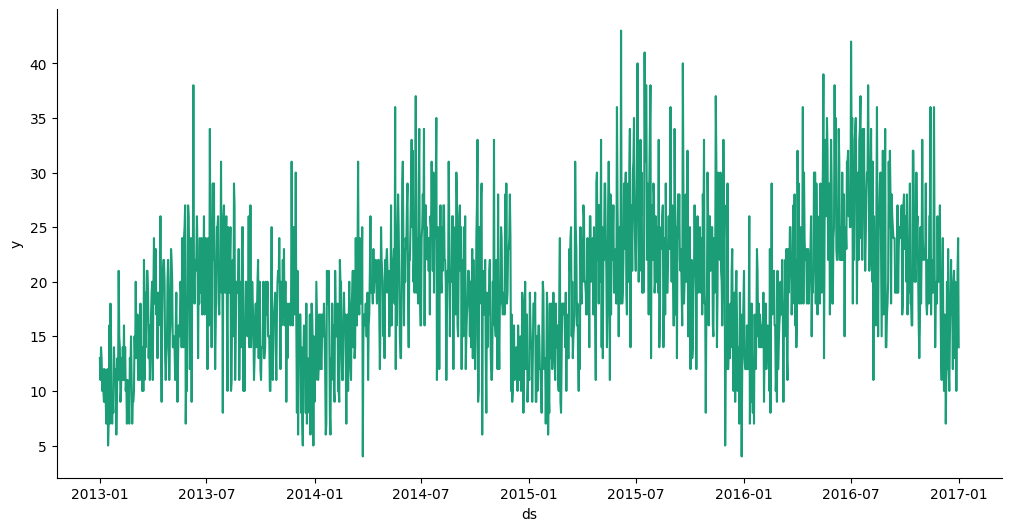

In [15]:
# @title ds vs y

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['y']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = prophet_train_df.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('y')

In [16]:
prophet_model = Prophet(interval_width=0.95)
prophet_model.fit(prophet_train_df)

future = prophet_model.make_future_dataframe(
    periods=test_size, include_history=False
)

y_prophet_forecast = prophet_model.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfq_x409z/78x2e8ox.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfq_x409z/qgc5guj6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9241', 'data', 'file=/tmp/tmpfq_x409z/78x2e8ox.json', 'init=/tmp/tmpfq_x409z/qgc5guj6.json', 'output', 'file=/tmp/tmpfq_x409z/prophet_model9s32f_ss/prophet_model-20241004135257.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:52:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:52:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [17]:
y_prophet_forecast.head()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2017-01-01  22.655334   12.608272   29.701034    22.655334    22.655334   
1 2017-01-02  22.659383    4.545117   22.066468    22.659382    22.659383   
2 2017-01-03  22.663432    6.458328   24.723203    22.663404    22.663439   
3 2017-01-04  22.667480    7.849426   24.399459    22.667415    22.667510   
4 2017-01-05  22.671529    8.024880   25.453065    22.671428    22.671588   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0       -1.504652             -1.504652             -1.504652  3.723695   
1       -9.438402             -9.438402             -9.438402 -4.232830   
2       -6.835870             -6.835870             -6.835870 -1.635981   
3       -6.324686             -6.324686             -6.324686 -1.114474   
4       -5.942753             -5.942753             -5.942753 -0.707771   

   weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0      3.723695      3.723695 -5.228347     -5.228347     -5.228347   
1     -4.232830     -4.232830 -5.205571     -5.205571     -5.205571   
2     -1.635981     -1.635981 -5.199889     -5.199889     -5.199889   
3     -1.114474     -1.114474 -5.210212     -5.210212     -5.210212   
4     -0.707771     -0.707771 -5.234982     -5.234982     -5.234982   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper       yhat  
0                         0.0  21.150682  
1                         0.0  13.220981  
2                         0.0  15.827562  
3                         0.0  16.342794  
4                         0.0  16.728776

–ú–æ–¥–µ–ª—å –¥–ª—è –∫–∞–∂–¥–æ–π –¥–∞—Ç—ã —Ä–∞—Å–∫–ª–∞–¥—ã–≤–∞–µ—Ç —Å–≤–æ—ë –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã.

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

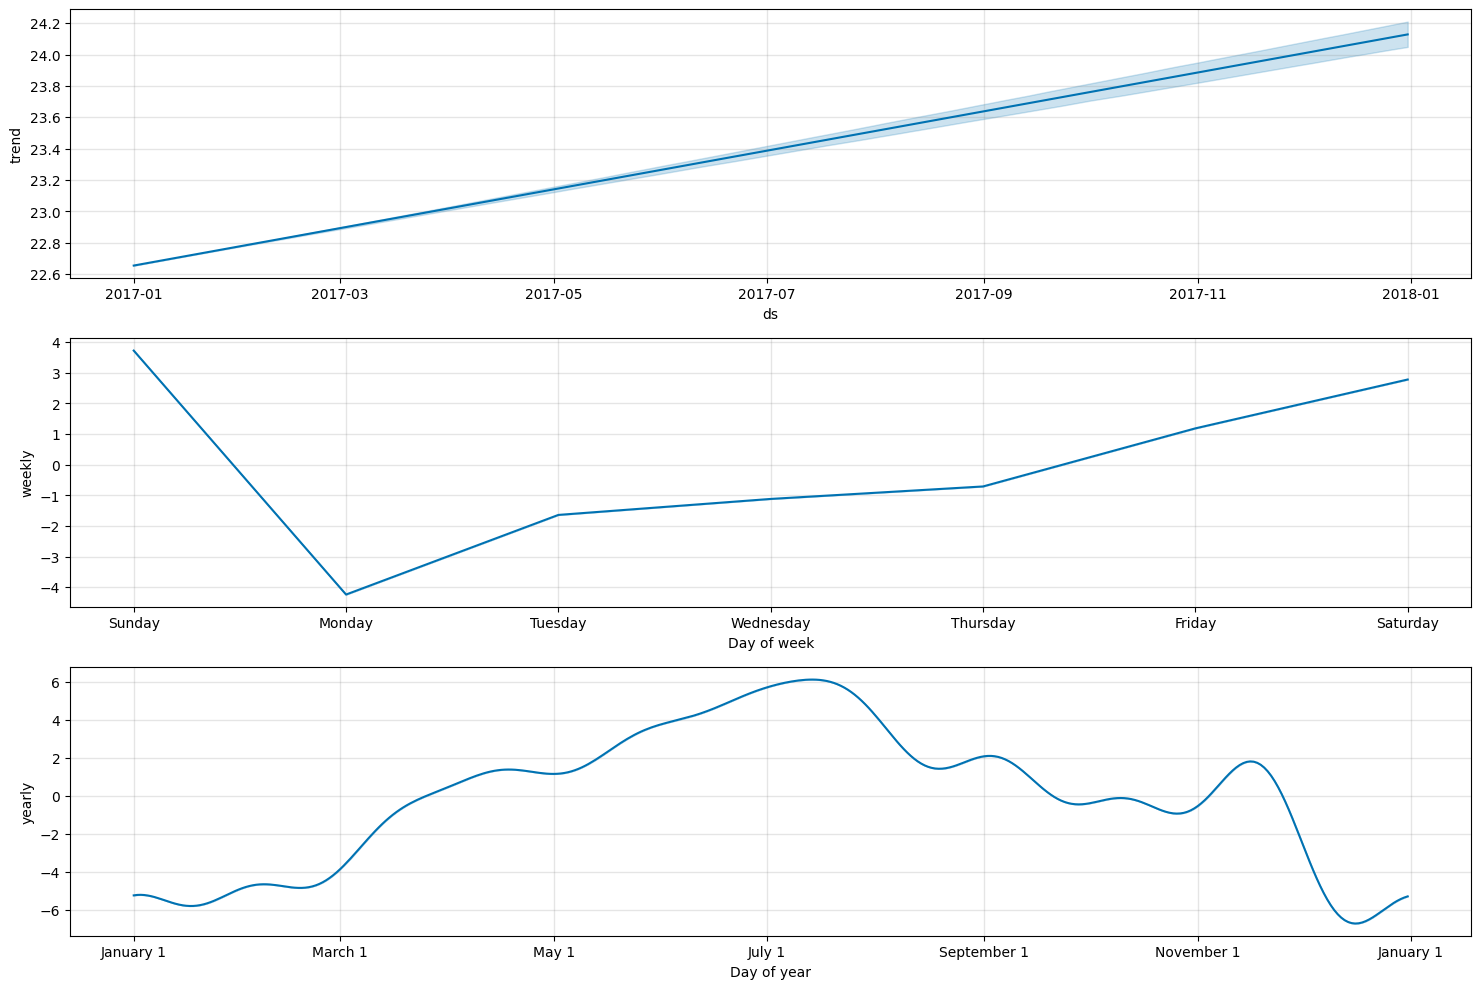

In [18]:
prophet_model.plot_components(y_prophet_forecast, figsize=(15, 10))
plt.show()

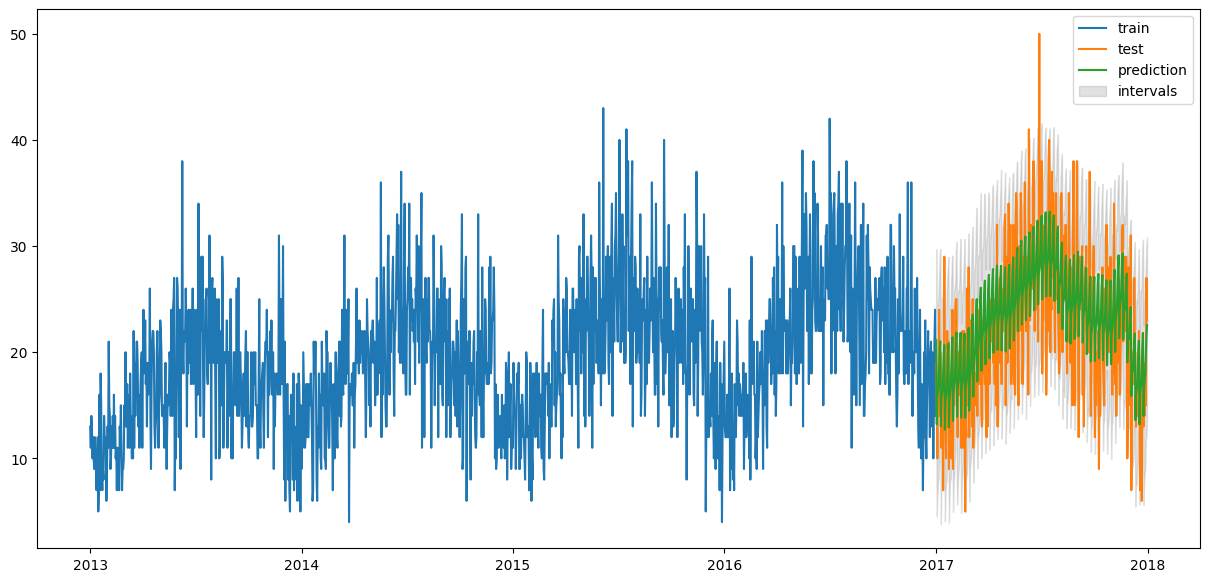

In [19]:
plot_results(data_train, data_test, y_prophet_forecast['yhat'], plot_conf_int=True,
             left_bound=y_prophet_forecast['yhat_lower'],
             right_bound=y_prophet_forecast['yhat_upper'])

In [20]:
compare_table = add_method_comparison('Prophet', data_test, y_prophet_forecast['yhat'])
compare_table

method        MSE       MAE       MAPE
0  Prophet  24.680305  4.032057  22.233153

#### **–ó–∞–¥–∞–Ω–∏–µ**
- –û–±—É—á–∏—Ç–µ –º–æ–¥–µ–ª—å Prophet —Å —É—á—ë—Ç–æ–º –ø—Ä–∞–∑–¥–Ω–∏–∫–æ–≤ –°–®–ê ‚Äî *Prophet + US holidays*.
- –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ë–æ–∫—Å–∞ ‚Äî –ö–æ–∫—Å–∞: –æ–±—É—á–∏—Ç–µ –º–æ–¥–µ–ª—å Prophet –Ω–∞ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω–æ–º —Ç–∞—Ä–≥–µ—Ç–µ ‚Äî *Prophet*:
    - —Å–¥–µ–ª–∞–π—Ç–µ –ø—Ä—è–º–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –Ω–∞–¥ —Ç–∞—Ä–≥–µ—Ç–æ–º sps.boxcox(y);
    - –ø–æ—Ç–æ–º —Å–¥–µ–ª–∞–π—Ç–µ –æ–±—Ä–∞—Ç–Ω–æ–µ (–Ω—É–∂–Ω–æ –Ω–∞–ø–∏—Å–∞—Ç—å —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ).

### 4.2. Prophet + US holidays

In [22]:
!pip install prophet


In [21]:
from prophet import Prophet

# –°–æ–∑–¥–∞–µ–º –º–æ–¥–µ–ª—å Prophet –∏ –¥–æ–±–∞–≤–ª—è–µ–º –ø—Ä–∞–∑–¥–Ω–∏–∫–∏ –°–®–ê
prophet_model_with_holidays = Prophet(interval_width=0.95)
prophet_model_with_holidays.add_country_holidays(country_name='US')

# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å
prophet_model_with_holidays.fit(prophet_train_df)

# –°–æ–∑–¥–∞–µ–º –±—É–¥—É—â–µ–µ –Ω–∞ 365 –¥–Ω–µ–π
future = prophet_model_with_holidays.make_future_dataframe(periods=test_size, include_history=False)

# –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º
y_prophet_forecast_holidays = prophet_model_with_holidays.predict(future)

# –í—ã–≤–æ–¥–∏–º –ø—Ä–æ–≥–Ω–æ–∑
print(y_prophet_forecast_holidays[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfq_x409z/s_4246q9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfq_x409z/5eniqe7z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=137', 'data', 'file=/tmp/tmpfq_x409z/s_4246q9.json', 'init=/tmp/tmpfq_x409z/5eniqe7z.json', 'output', 'file=/tmp/tmpfq_x409z/prophet_modelzx1ijdew/prophet_model-20241004135327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds       yhat  yhat_lower  yhat_upper
0 2017-01-01  21.988325   13.393232   29.959927
1 2017-01-02  13.196748    5.056746   22.250236
2 2017-01-03  15.727021    7.332875   24.322769
3 2017-01-04  16.246140    7.697157   24.983501
4 2017-01-05  16.623732    8.253817   24.310473


### 4.3. Prophet. –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ë–æ–∫—Å–∞ ‚Äî –ö–æ–∫—Å–∞

–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ë–æ–∫—Å–∞-–ö–æ–∫—Å–∞ (Box-Cox) –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã —É–ª—É—á—à–∏—Ç—å —Å–≤–æ–π—Å—Ç–≤–∞ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞, —Ç–∞–∫–∏–µ –∫–∞–∫ —Å—Ç–∞–±–∏–ª–∏–∑–∞—Ü–∏—è –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –∏ –ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –∫ –±–æ–ª–µ–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é. –î–∞–≤–∞–π—Ç–µ —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º, –ø–æ—á–µ–º—É —ç—Ç–æ –º–æ–∂–µ—Ç —É–ª—É—á—à–∏—Ç—å –ø—Ä–æ–≥–Ω–æ–∑—ã:

### 1. **–°—Ç–∞–±–∏–ª–∏–∑–∞—Ü–∏—è –¥–∏—Å–ø–µ—Ä—Å–∏–∏**
–í–æ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–∞—Ö –¥–∏—Å–ø–µ—Ä—Å–∏—è (—Ä–∞–∑–±—Ä–æ—Å –¥–∞–Ω–Ω—ã—Ö) –º–æ–∂–µ—Ç –º–µ–Ω—è—Ç—å—Å—è —Å–æ –≤—Ä–µ–º–µ–Ω–µ–º, –∏ —ç—Ç–æ –¥–µ–ª–∞–µ—Ç –¥–∞–Ω–Ω—ã–µ **–≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω—ã–º–∏** (—Ç–æ –µ—Å—Ç—å, —Ä–∞–∑–±—Ä–æ—Å –¥–∞–Ω–Ω—ã—Ö –Ω–µ –æ–¥–∏–Ω–∞–∫–æ–≤ –≤ —Ä–∞–∑–Ω—ã—Ö –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ç–æ—á–∫–∞—Ö). –ú–æ–¥–µ–ª—å Prophet, –∫–∞–∫ –∏ –¥—Ä—É–≥–∏–µ –º–æ–¥–µ–ª–∏, –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ **—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã**, —Ç–æ –µ—Å—Ç—å —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∏ –¥–∏—Å–ø–µ—Ä—Å–∏—è –æ—Å—Ç–∞—é—Ç—Å—è –ø–æ—Å—Ç–æ—è–Ω–Ω—ã–º–∏ –Ω–∞ –ø—Ä–æ—Ç—è–∂–µ–Ω–∏–∏ –≤—Å–µ–≥–æ –≤—Ä–µ–º–µ–Ω–∏.

- **–ë–µ–∑ —Å—Ç–∞–±–∏–ª–∏–∑–∞—Ü–∏–∏ –¥–∏—Å–ø–µ—Ä—Å–∏–∏**: –ï—Å–ª–∏ –¥–∏—Å–ø–µ—Ä—Å–∏—è —Ä–∞—Å—Ç–µ—Ç –∏–ª–∏ –ø–∞–¥–∞–µ—Ç –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –≤—Ä–µ–º–µ–Ω–∏, –º–æ–¥–µ–ª—å –º–æ–∂–µ—Ç –ø–µ—Ä–µ–æ—Ü–µ–Ω–∏–≤–∞—Ç—å –≤–ª–∏—è–Ω–∏–µ –∏–∑–º–µ–Ω–µ–Ω–∏–π –≤ –¥–∞–Ω–Ω—ã—Ö, –¥–µ–ª–∞—è –ø—Ä–æ–≥–Ω–æ–∑—ã –º–µ–Ω–µ–µ —Ç–æ—á–Ω—ã–º–∏.
- **–° –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ–º –ë–æ–∫—Å–∞-–ö–æ–∫—Å–∞**: –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ø–æ–º–æ–≥–∞–µ—Ç "–≤—ã–ø—Ä—è–º–∏—Ç—å" —Ä–∞–∑–±—Ä–æ—Å –¥–∞–Ω–Ω—ã—Ö. –û–Ω–æ –¥–µ–ª–∞–µ—Ç —Ç–∞–∫, —á—Ç–æ–±—ã –¥–∞–Ω–Ω—ã–µ –∏–º–µ–ª–∏ –±–æ–ª–µ–µ –ø–æ—Å—Ç–æ—è–Ω–Ω—ã–π —Ä–∞–∑–±—Ä–æ—Å, –∏ –º–æ–¥–µ–ª—å –º–æ–∂–µ—Ç –ª—É—á—à–µ —É—á–∏—Ç—ã–≤–∞—Ç—å –¥–æ–ª–≥–æ—Å—Ä–æ—á–Ω—ã–µ —Ç—Ä–µ–Ω–¥—ã –∏ —Å–µ–∑–æ–Ω–Ω—ã–µ —ç—Ñ—Ñ–µ–∫—Ç—ã.

### 2. **–ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é**
–í–æ –º–Ω–æ–≥–∏—Ö –º–æ–¥–µ–ª—è—Ö –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤ –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç—Å—è, —á—Ç–æ –æ—à–∏–±–∫–∏ –∏ –æ—Å—Ç–∞—Ç–∫–∏ –∏–º–µ—é—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ. –ù–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–∞–∂–Ω–æ –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã:
- –ü—Ä–æ–≥–Ω–æ–∑—ã –±—ã–ª–∏ **—Å–∏–º–º–µ—Ç—Ä–∏—á–Ω—ã–º–∏** –≤–æ–∫—Ä—É–≥ —Å—Ä–µ–¥–Ω–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è.
- –û—Ü–µ–Ω–∫–∞ –Ω–µ–æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ—Å—Ç–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã) –±—ã–ª–∞ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–π.

–ß–∞—Å—Ç–æ —Ä–µ–∞–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤ –∏–º–µ—é—Ç **—Å–∏–ª—å–Ω—ã–µ –≤—ã–±—Ä–æ—Å—ã** –∏ –∞—Å–∏–º–º–µ—Ç—Ä–∏—é. –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ë–æ–∫—Å–∞-–ö–æ–∫—Å–∞ –¥–µ–ª–∞–µ—Ç –¥–∞–Ω–Ω—ã–µ –±–æ–ª–µ–µ "–Ω–æ—Ä–º–∞–ª—å–Ω—ã–º–∏" (–±–æ–ª–µ–µ —Å–∏–º–º–µ—Ç—Ä–∏—á–Ω—ã–º–∏) –∏ –ø–æ–º–æ–≥–∞–µ—Ç –º–æ–¥–µ–ª–∏ –ª—É—á—à–µ —Å–ø—Ä–∞–≤–ª—è—Ç—å—Å—è —Å –≤—ã–±—Ä–æ—Å–∞–º–∏ –∏ –Ω–µ—Å—Ç–∞–±–∏–ª—å–Ω—ã–º–∏ –∏–∑–º–µ–Ω–µ–Ω–∏—è–º–∏.

### 3. **–ì–∏–±–∫–æ—Å—Ç—å –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è**
Box-Cox –ø–æ–∑–≤–æ–ª—è–µ—Ç –ø—Ä–∏–º–µ–Ω—è—Ç—å —Ä–∞–∑–Ω—ã–µ —É—Ä–æ–≤–Ω–∏ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏–∏ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ Œª (lambda):
- –ï—Å–ª–∏ Œª –±–ª–∏–∑–∫–æ –∫ 1, –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ø–æ—á—Ç–∏ –Ω–µ –º–µ–Ω—è–µ—Ç –¥–∞–Ω–Ω—ã–µ.
- –ï—Å–ª–∏ Œª –±–ª–∏–∑–∫–æ –∫ 0, –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ø—Ä–µ–≤—Ä–∞—â–∞–µ—Ç—Å—è –≤ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–µ, —á—Ç–æ –ø–æ–ª–µ–∑–Ω–æ –¥–ª—è –¥–∞–Ω–Ω—ã—Ö —Å —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–º —Ä–æ—Å—Ç–æ–º.

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –ë–æ–∫—Å-–ö–æ–∫—Å –º–æ–∂–µ—Ç **–≥–∏–±–∫–æ –∞–¥–∞–ø—Ç–∏—Ä–æ–≤–∞—Ç—å—Å—è** –∫ —Å—Ç—Ä—É–∫—Ç—É—Ä–µ –¥–∞–Ω–Ω—ã—Ö, —á—Ç–æ –ø–æ–º–æ–≥–∞–µ—Ç –ª—É—á—à–µ –∑–∞—Ö–≤–∞—Ç–∏—Ç—å –∏—Ö —Å–≤–æ–π—Å—Ç–≤–∞.

### –ü—Ä–æ—Å—Ç–æ–µ –æ–±—ä—è—Å–Ω–µ–Ω–∏–µ –Ω–∞ –ø—Ä–∏–º–µ—Ä–µ:
–ü—Ä–µ–¥—Å—Ç–∞–≤–∏–º, —á—Ç–æ —É –Ω–∞—Å –µ—Å—Ç—å –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ –ø—Ä–æ–¥–∞–∂, –≥–¥–µ –ø–æ –º–µ—Ä–µ —Ä–æ—Å—Ç–∞ –±–∏–∑–Ω–µ—Å–∞ –ø—Ä–æ–¥–∞–∂–∏ —Å–∏–ª—å–Ω–æ —É–≤–µ–ª–∏—á–∏–≤–∞—é—Ç—Å—è –∏ –∫–æ–ª–µ–±–∞–Ω–∏—è (—à—É–º) –≤ –¥–∞–Ω–Ω—ã—Ö —Å—Ç–∞–Ω–æ–≤—è—Ç—Å—è –≤—Å–µ –±–æ–ª—å—à–µ. –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞—Ç—å –±—É–¥—É—â–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ —Ç–∞–∫–∏—Ö –¥–∞–Ω–Ω—ã—Ö —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è —Å–ª–æ–∂–Ω–µ–µ, –ø–æ—Ç–æ–º—É —á—Ç–æ –∫–æ–ª–µ–±–∞–Ω–∏—è –Ω–∞–∫–∞–ø–ª–∏–≤–∞—é—Ç—Å—è.

–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ë–æ–∫—Å–∞-–ö–æ–∫—Å–∞ —É–º–µ–Ω—å—à–∞–µ—Ç –≤–ª–∏—è–Ω–∏–µ —Å–∏–ª—å–Ω—ã—Ö –∫–æ–ª–µ–±–∞–Ω–∏–π –∏ –ø—Ä–∏–≤–æ–¥–∏—Ç –¥–∞–Ω–Ω—ã–µ –∫ –±–æ–ª–µ–µ —É–ø—Ä–∞–≤–ª—è–µ–º–æ–º—É –≤–∏–¥—É. –ù–∞–ø—Ä–∏–º–µ—Ä, –¥–∞–Ω–Ω—ã–µ, –∫–æ—Ç–æ—Ä—ã–µ —Ä–∞—Å—Ç—É—Ç —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ, –º–æ–≥—É—Ç —Å—Ç–∞—Ç—å –±–æ–ª–µ–µ –ª–∏–Ω–µ–π–Ω—ã–º–∏, –∏ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞—Ç—å –∏—Ö —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è –ª–µ–≥—á–µ.

### –ü–æ–¥–≤–µ–¥–µ–º –∏—Ç–æ–≥:
–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ë–æ–∫—Å–∞-–ö–æ–∫—Å–∞ –ø–æ–º–æ–≥–∞–µ—Ç:
1. **–°–¥–µ–ª–∞—Ç—å –¥–∞–Ω–Ω—ã–µ –±–æ–ª–µ–µ –æ–¥–Ω–æ—Ä–æ–¥–Ω—ã–º–∏** –ø–æ –¥–∏—Å–ø–µ—Ä—Å–∏–∏.
2. **–°–≥–ª–∞–¥–∏—Ç—å –≤—ã–±—Ä–æ—Å—ã** –∏ –∞—Å–∏–º–º–µ—Ç—Ä–∏—é, –ø—Ä–∏–±–ª–∏–∂–∞—è –¥–∞–Ω–Ω—ã–µ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é.
3. **–£–ª—É—á—à–∏—Ç—å —Ç–æ—á–Ω–æ—Å—Ç—å –ø—Ä–æ–≥–Ω–æ–∑–æ–≤**, –ø–æ—Ç–æ–º—É —á—Ç–æ –º–æ–¥–µ–ª—å –ª—É—á—à–µ —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è —Å —Ç—Ä–µ–Ω–¥–∞–º–∏, —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å—é –∏ –Ω–µ–æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ—Å—Ç—å—é.

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –ë–æ–∫—Å-–ö–æ–∫—Å –ø–æ–º–æ–≥–∞–µ—Ç –º–æ–¥–µ–ª–∏ –≤–∏–¥–µ—Ç—å –¥–∞–Ω–Ω—ã–µ –≤ –±–æ–ª–µ–µ —É–ø–æ—Ä—è–¥–æ—á–µ–Ω–Ω–æ–º –≤–∏–¥–µ –∏ –≤—ã–¥–∞–≤–∞—Ç—å –±–æ–ª–µ–µ —Ç–æ—á–Ω—ã–µ –ø—Ä–æ–≥–Ω–æ–∑—ã.

In [22]:
#todo
import scipy.stats as sps
import numpy as np

# –ü—Ä—è–º–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ë–æ–∫—Å–∞ ‚Äî –ö–æ–∫—Å–∞
y_train_transformed, lambda_bc = sps.boxcox(prophet_train_df['y'])

# –°–æ–∑–¥–∞–µ–º –Ω–æ–≤—ã–π DataFrame —Å –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω—ã–º —Ç–∞—Ä–≥–µ—Ç–æ–º
prophet_train_bc_df = prophet_train_df.copy()
prophet_train_bc_df['y'] = y_train_transformed

# –°–æ–∑–¥–∞–µ–º –∏ –æ–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å Prophet –Ω–∞ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω–æ–º —Ç–∞—Ä–≥–µ—Ç–µ
prophet_model_bc = Prophet(interval_width=0.95)
prophet_model_bc.fit(prophet_train_bc_df)

# –°–æ–∑–¥–∞–µ–º –±—É–¥—É—â–µ–µ –Ω–∞ 365 –¥–Ω–µ–π
future = prophet_model_bc.make_future_dataframe(periods=test_size, include_history=False)

# –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º
y_prophet_forecast_bc = prophet_model_bc.predict(future)

# –û–±—Ä–∞—Ç–Ω–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ë–æ–∫—Å–∞ ‚Äî –ö–æ–∫—Å–∞
def inverse_boxcox(y, lambda_bc):
    if lambda_bc == 0:
        return np.exp(y)  # –ï—Å–ª–∏ Œª = 0, —Ç–æ —ç—Ç–æ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ
    else:
        return np.power((y * lambda_bc) + 1, 1 / lambda_bc)

# –ü—Ä–∏–º–µ–Ω—è–µ–º –æ–±—Ä–∞—Ç–Ω–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∫ –ø—Ä–æ–≥–Ω–æ–∑–∞–º
y_forecast_inverse_bc = inverse_boxcox(y_prophet_forecast_bc['yhat'], lambda_bc)

# –í—ã–≤–æ–¥–∏–º –Ω–µ—Å–∫–æ–ª—å–∫–æ —Å—Ç—Ä–æ–∫ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏
print(y_forecast_inverse_bc.head())


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfq_x409z/d9k41gcr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfq_x409z/tlq0wucd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16232', 'data', 'file=/tmp/tmpfq_x409z/d9k41gcr.json', 'init=/tmp/tmpfq_x409z/tlq0wucd.json', 'output', 'file=/tmp/tmpfq_x409z/prophet_modelw6r2my5w/prophet_model-20241004135334.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0    20.388432
1    12.947632
2    15.336700
3    15.850173
4    16.182808
Name: yhat, dtype: float64


In [23]:
y_prophet_forecast_bc.head()

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2017-01-01  8.479440    5.637187   10.215590     8.479440     8.479440   
1 2017-01-02  8.480607    3.362337    8.087917     8.480607     8.480607   
2 2017-01-03  8.481773    4.287719    8.889172     8.481773     8.481773   
3 2017-01-04  8.482939    4.363891    9.154384     8.482933     8.482948   
4 2017-01-05  8.484105    4.357364    9.022958     8.484089     8.484125   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0       -0.500518             -0.500518             -0.500518  1.007938   
1       -2.712399             -2.712399             -2.712399 -1.207226   
2       -1.954810             -1.954810             -1.954810 -0.447770   
3       -1.799769             -1.799769             -1.799769 -0.286082   
4       -1.700911             -1.700911             -1.700911 -0.176308   

   weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0      1.007938      1.007938 -1.508456     -1.508456     -1.508456   
1     -1.207226     -1.207226 -1.505173     -1.505173     -1.505173   
2     -0.447770     -0.447770 -1.507040     -1.507040     -1.507040   
3     -0.286082     -0.286082 -1.513687     -1.513687     -1.513687   
4     -0.176308     -0.176308 -1.524603     -1.524603     -1.524603   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper      yhat  
0                         0.0  7.978922  
1                         0.0  5.768208  
2                         0.0  6.526963  
3                         0.0  6.683170  
4                         0.0  6.783194

### 5. AutoARIMA [without exog]

### 5.1. AutoARIMA [without exog]

In [24]:
arima_model = auto_arima(data_train, seasonal=True, m = 7)

In [25]:
y_arima_forecast, conf_int = arima_model.predict(n_periods=test_size, return_conf_int=True, alpha=0.05)

In [26]:
y_forecast_inverse_bc

0      20.388432
1      12.947632
2      15.336700
3      15.850173
4      16.182808
         ...    
360    16.920434
361    17.402563
362    19.355852
363    20.935128
364    21.937383
Name: yhat, Length: 365, dtype: float64

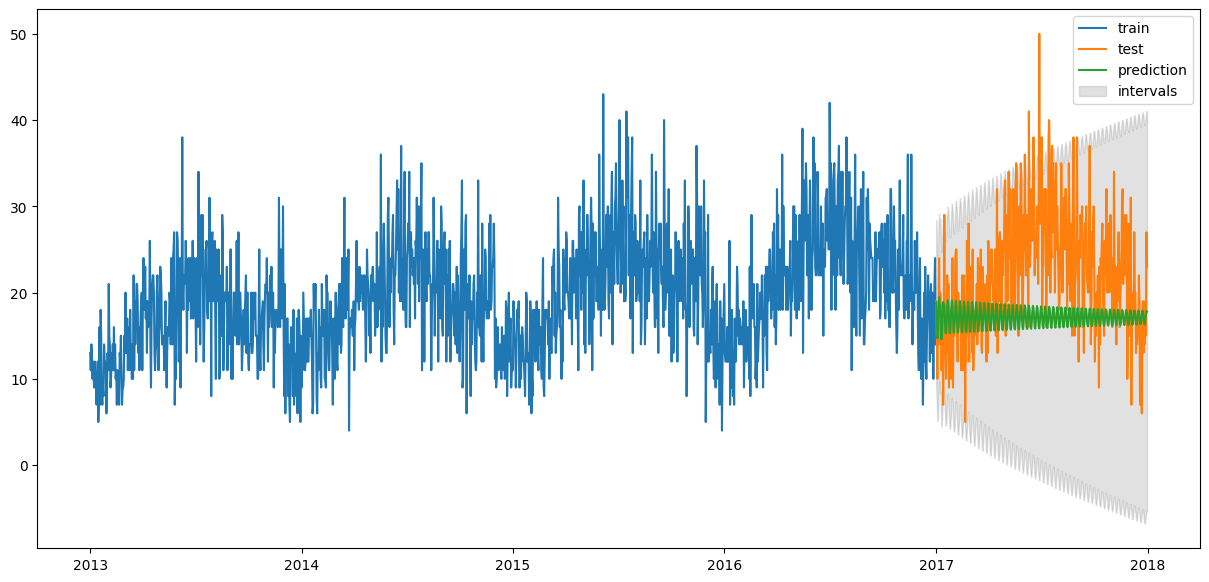

In [27]:
plot_results(data_train, data_test, y_arima_forecast, plot_conf_int=True,
             left_bound=conf_int.T[0],
             right_bound=conf_int.T[1])

In [28]:
compare_table = add_method_comparison('Auto arima model', data_test, y_arima_forecast, compare_table)
compare_table

method        MSE       MAE       MAPE
0           Prophet  24.680305  4.032057  22.233153
1  Auto arima model  70.907815  6.650232  28.894886

In [29]:
compare_table = add_method_comparison('Prophet Box-Cox inverce', data_test, y_forecast_inverse_bc, compare_table)

# –ü—Ä–æ—Å–º–æ—Ç—Ä –æ–±–Ω–æ–≤–ª–µ–Ω–Ω–æ–π —Ç–∞–±–ª–∏—Ü—ã —Å—Ä–∞–≤–Ω–µ–Ω–∏—è
compare_table

method        MSE       MAE       MAPE
0                  Prophet  24.680305  4.032057  22.233153
1         Auto arima model  70.907815  6.650232  28.894886
2  Prophet Box-Cox inverce  24.215373  3.995935  21.762779

In [30]:
# –ü–æ–ª—É—á–∞–µ–º —Ç–æ–ª—å–∫–æ —Å—Ç–æ–ª–±–µ—Ü 'yhat' –∏–∑ –ø—Ä–æ–≥–Ω–æ–∑–æ–≤
yhat_values = y_prophet_forecast_holidays['yhat']

# –î–æ–±–∞–≤–ª—è–µ–º –≤ —Ç–∞–±–ª–∏—Ü—É —Å—Ä–∞–≤–Ω–µ–Ω–∏—è
compare_table = add_method_comparison('Prophet with Holidays', data_test, yhat_values, compare_table)

# –ü—Ä–æ—Å–º–æ—Ç—Ä –æ–±–Ω–æ–≤–ª–µ–Ω–Ω–æ–π —Ç–∞–±–ª–∏—Ü—ã —Å—Ä–∞–≤–Ω–µ–Ω–∏—è
compare_table


method        MSE       MAE       MAPE
0                  Prophet  24.680305  4.032057  22.233153
1         Auto arima model  70.907815  6.650232  28.894886
2  Prophet Box-Cox inverce  24.215373  3.995935  21.762779
3    Prophet with Holidays  24.949507  4.061328  22.420432

In [31]:
# –ü–æ–ª—É—á–∞–µ–º —Ç–æ–ª—å–∫–æ —Å—Ç–æ–ª–±–µ—Ü 'yhat' –∏–∑ –ø—Ä–æ–≥–Ω–æ–∑–æ–≤
yhat_bc_values = y_prophet_forecast_bc['yhat']

# –î–æ–±–∞–≤–ª—è–µ–º –≤ —Ç–∞–±–ª–∏—Ü—É —Å—Ä–∞–≤–Ω–µ–Ω–∏—è
compare_table = add_method_comparison('Prophet Box-Cox', data_test, yhat_bc_values, compare_table)

# –ü—Ä–æ—Å–º–æ—Ç—Ä –æ–±–Ω–æ–≤–ª–µ–Ω–Ω–æ–π —Ç–∞–±–ª–∏—Ü—ã —Å—Ä–∞–≤–Ω–µ–Ω–∏—è
compare_table

method         MSE        MAE       MAPE
0                  Prophet   24.680305   4.032057  22.233153
1         Auto arima model   70.907815   6.650232  28.894886
2  Prophet Box-Cox inverce   24.215373   3.995935  21.762779
3    Prophet with Holidays   24.949507   4.061328  22.420432
4          Prophet Box-Cox  219.055600  13.502198  57.891796

### 5.2. AutoARIMA exog

In [32]:
exog = pd.DataFrame({'date': data.index})
exog = exog.set_index(exog['date'])

exog['sin365'] = np.sin(2 * np.pi * exog.index.dayofyear / 365.25)
exog['cos365'] = np.cos(2 * np.pi * exog.index.dayofyear / 365.25)

exog['sin365_2'] = np.sin(4 * np.pi * exog.index.dayofyear / 365.25)
exog['cos365_2'] = np.cos(4 * np.pi * exog.index.dayofyear / 365.25)

exog = exog.drop(columns=['date'])

exog_to_train = exog.iloc[:-test_size]
exog_to_test = exog.iloc[-test_size:]

todo: –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ –º–æ–¥–µ–ª—å `auto_arima` —Å —ç–∫–∑–æ–≥–µ–Ω–Ω—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏, –∫–æ—Ç–æ—Ä—ã–µ —Å–æ–∑–¥–∞–Ω—ã –≤—ã—à–µ (–∏—Ö –Ω–µ –Ω–∞–¥–æ –º–µ–Ω—è—Ç—å).

–ü–æ—Å—á–∏—Ç–∞–π—Ç–µ –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –∏ –¥–æ–±–∞–≤—å—Ç–µ –∏—Ö –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º (—Å—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω—É—é —Ç–∞–±–ª–∏—Ü—É) —Å –º–µ—Ç—Ä–∏–∫–∞–º–∏ –ø–æ –≤—Å–µ–º –æ–±—É—á–µ–Ω–Ω—ã–º –¥–æ —ç—Ç–æ–≥–æ –º–æ–¥–µ–ª—è–º.

### –®–∞–≥ 1: –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ auto_arima —Å —ç–∫–∑–æ–≥–µ–Ω–Ω—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏

In [33]:
#to do
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ AutoARIMA —Å —ç–∫–∑–æ–≥–µ–Ω–Ω—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏
arima_model_exog = auto_arima(data_train, exogenous=exog_to_train, seasonal=True, m=7, stepwise=True)

# –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ —Å —ç–∫–∑–æ–≥–µ–Ω–Ω—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏
y_arima_forecast_exog = arima_model_exog.predict(n_periods=test_size, exogenous=exog_to_test)


### –®–∞–≥ 2: –†–∞—Å—á–µ—Ç –º–µ—Ç—Ä–∏–∫ –∫–∞—á–µ—Å—Ç–≤–∞

In [34]:
# –†–∞—Å—á–µ—Ç –º–µ—Ç—Ä–∏–∫ –∫–∞—á–µ—Å—Ç–≤–∞
rmse_exog = np.sqrt(mean_squared_error(data_test, y_arima_forecast_exog))
mae_exog = mean_absolute_error(data_test, y_arima_forecast_exog)
mape_exog = np.mean(np.abs((data_test - y_arima_forecast_exog) / data_test)) * 100

# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫
print(f"RMSE: {rmse_exog}")
print(f"MAE: {mae_exog}")
print(f"MAPE: {mape_exog}")


RMSE: 8.420677823229779
MAE: 6.650232319693095
MAPE: 28.89488637982214


### –®–∞–≥ 3: –î–æ–±–∞–≤–ª–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –≤ —Å—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω—É—é —Ç–∞–±–ª–∏—Ü—É

In [35]:
# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –≤ —Å—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω—É—é —Ç–∞–±–ª–∏—Ü—É
compare_table = add_method_comparison('Auto ARIMA with exogenous', data_test, y_arima_forecast_exog, compare_table)

# –ü—Ä–æ—Å–º–æ—Ç—Ä –æ–±–Ω–æ–≤–ª–µ–Ω–Ω–æ–π —Ç–∞–±–ª–∏—Ü—ã —Å—Ä–∞–≤–Ω–µ–Ω–∏—è
compare_table


method         MSE        MAE       MAPE
0                    Prophet   24.680305   4.032057  22.233153
1           Auto arima model   70.907815   6.650232  28.894886
2    Prophet Box-Cox inverce   24.215373   3.995935  21.762779
3      Prophet with Holidays   24.949507   4.061328  22.420432
4            Prophet Box-Cox  219.055600  13.502198  57.891796
5  Auto ARIMA with exogenous   70.907815   6.650232  28.894886

### 6. SARIMAX [without exog]

### 6.1. SARIMAX [without exog]

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# –ø–µ—Ä–µ–¥–∞–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –∏–∑ –ø—Ä–æ—à–ª–æ–π –º–æ–¥–µ–ª–∏
real_sarimax_model = SARIMAX(data_train, order=(3, 1, 5), seasonal_order=(0, 0, 2, 7),
    seasonal_periods=7,
    ).fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_periods']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [37]:
forecast = real_sarimax_model.get_forecast(steps=len(data_test))
y_sarimax_real_forecast = forecast.predicted_mean
conf_int = forecast.conf_int()


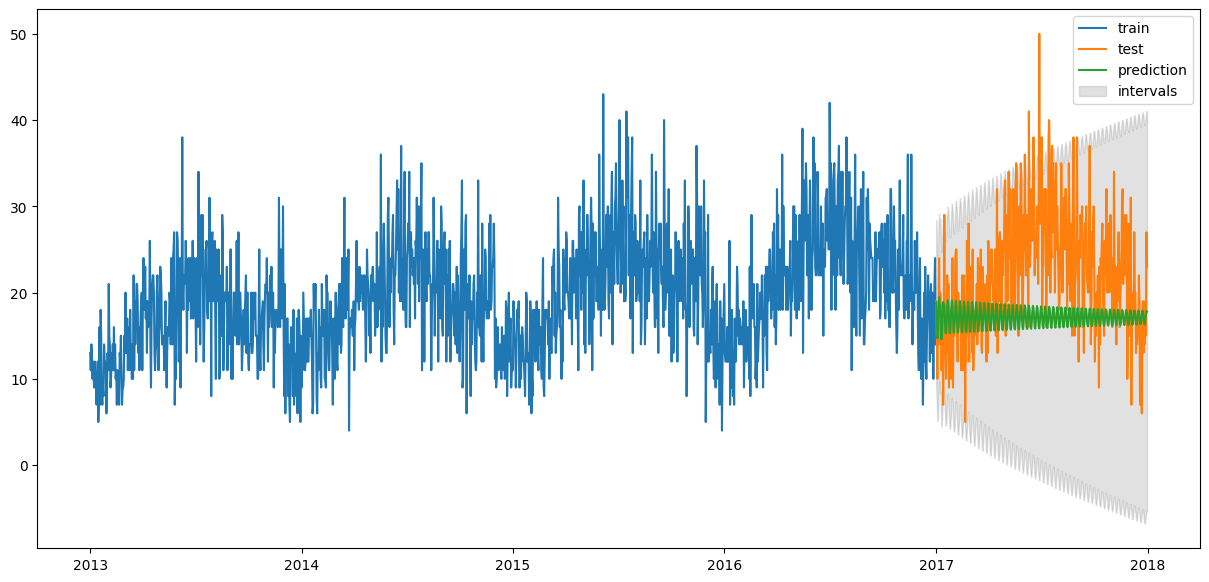

In [38]:
plot_results(data_train, data_test,
             y_sarimax_real_forecast, plot_conf_int=True,
             left_bound=conf_int['lower sales'], right_bound=conf_int['upper sales'])

In [39]:
compare_table = add_method_comparison('Original SARIMAX', data_test, y_sarimax_real_forecast, compare_table)
compare_table

method         MSE        MAE       MAPE
0                    Prophet   24.680305   4.032057  22.233153
1           Auto arima model   70.907815   6.650232  28.894886
2    Prophet Box-Cox inverce   24.215373   3.995935  21.762779
3      Prophet with Holidays   24.949507   4.061328  22.420432
4            Prophet Box-Cox  219.055600  13.502198  57.891796
5  Auto ARIMA with exogenous   70.907815   6.650232  28.894886
6           Original SARIMAX   70.907815   6.650232  28.894886

### 6.2. SARIMAX with exog

In [51]:
exog = pd.DataFrame({'date': data.index})
exog = exog.set_index(exog['date'])

exog['sin365'] = np.sin(2 * np.pi * exog.index.dayofyear / 365.25)
exog['cos365'] = np.cos(2 * np.pi * exog.index.dayofyear / 365.25)

exog['sin365_2'] = np.sin(4 * np.pi * exog.index.dayofyear / 365.25)
exog['cos365_2'] = np.cos(4 * np.pi * exog.index.dayofyear / 365.25)

exog = exog.drop(columns=['date'])

exog_to_train = exog.iloc[:-test_size]
exog_to_test = exog.iloc[-test_size:]

todo: –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ –º–æ–¥–µ–ª—å `SARIMAX` —Å —ç–∫–∑–æ–≥–µ–Ω–Ω—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏, –∫–æ—Ç–æ—Ä—ã–µ —Å–æ–∑–¥–∞–Ω—ã –≤—ã—à–µ (–∏—Ö –Ω–µ –Ω–∞–¥–æ –º–µ–Ω—è—Ç—å), –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π.

### –®–∞–≥ 1: –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ SARIMAX —Å —ç–∫–∑–æ–≥–µ–Ω–Ω—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏

In [52]:
#to do
# –û–ø—Ä–µ–¥–µ–ª–∏–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏ SARIMAX (p, d, q) –∏ (P, D, Q, s)
p = 1  # –ü–æ—Ä—è–¥–æ–∫ –∞–≤—Ç–æ—Ä–µ–≥—Ä–µ—Å—Å–∏–∏
d = 1  # –ü–æ—Ä—è–¥–æ–∫ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è
q = 1  # –ü–æ—Ä—è–¥–æ–∫ —Å–∫–æ–ª—å–∑—è—â–µ–π —Å—Ä–µ–¥–Ω–µ–π
P = 1  # –ü–æ—Ä—è–¥–æ–∫ —Å–µ–∑–æ–Ω–Ω–æ–π –∞–≤—Ç–æ—Ä–µ–≥—Ä–µ—Å—Å–∏–∏
D = 1  # –ü–æ—Ä—è–¥–æ–∫ —Å–µ–∑–æ–Ω–Ω–æ–≥–æ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è
Q = 1  # –ü–æ—Ä—è–¥–æ–∫ —Å–µ–∑–æ–Ω–Ω–æ–π —Å–∫–æ–ª—å–∑—è—â–µ–π —Å—Ä–µ–¥–Ω–µ–π
s = 7  # –°–µ–∑–æ–Ω–Ω–æ—Å—Ç—å (–Ω–∞–ø—Ä–∏–º–µ—Ä, 7 –¥–ª—è –Ω–µ–¥–µ–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ SARIMAX
sarimax_model = SARIMAX(data_train,
                         order=(p, d, q),
                         seasonal_order=(P, D, Q, s),
                         exog=exog_to_train)
sarimax_fit = sarimax_model.fit(disp=False)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### –®–∞–≥ 2: –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ –∏ –æ—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏

In [53]:
# –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ —Å —ç–∫–∑–æ–≥–µ–Ω–Ω—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏
y_sarimax_forecast = sarimax_fit.forecast(steps=test_size, exog=exog_to_test)

# –†–∞—Å—á–µ—Ç –º–µ—Ç—Ä–∏–∫ –∫–∞—á–µ—Å—Ç–≤–∞
rmse_sarimax = np.sqrt(mean_squared_error(data_test, y_sarimax_forecast))
mae_sarimax = mean_absolute_error(data_test, y_sarimax_forecast)
mape_sarimax = np.mean(np.abs((data_test - y_sarimax_forecast) / data_test)) * 100

# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫
print(f"RMSE: {rmse_sarimax}")
print(f"MAE: {mae_sarimax}")
print(f"MAPE: {mape_sarimax}")


RMSE: 4.852557666915127
MAE: 3.873271450630251
MAPE: 20.171214015805365


### –®–∞–≥ 3: –î–æ–±–∞–≤–ª–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –≤ —Å—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω—É—é —Ç–∞–±–ª–∏—Ü—É

In [54]:
# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –≤ —Å—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω—É—é —Ç–∞–±–ª–∏—Ü—É
compare_table = add_method_comparison('SARIMAX with exogenous', data_test, y_sarimax_forecast, compare_table)

# –ü—Ä–æ—Å–º–æ—Ç—Ä –æ–±–Ω–æ–≤–ª–µ–Ω–Ω–æ–π —Ç–∞–±–ª–∏—Ü—ã —Å—Ä–∞–≤–Ω–µ–Ω–∏—è
compare_table


method         MSE        MAE       MAPE
0                    Prophet   24.680305   4.032057  22.233153
1           Auto arima model   70.907815   6.650232  28.894886
2    Prophet Box-Cox inverce   24.215373   3.995935  21.762779
3      Prophet with Holidays   24.949507   4.061328  22.420432
4            Prophet Box-Cox  219.055600  13.502198  57.891796
5  Auto ARIMA with exogenous   70.907815   6.650232  28.894886
6           Original SARIMAX   70.907815   6.650232  28.894886
7     SARIMAX with exogenous   23.547316   3.873271  20.171214

###  –ê–Ω–∞–ª–∏–∑ –æ—Å—Ç–∞—Ç–∫–æ–≤ –º–æ–¥–µ–ª–∏

‚Äî –≤–∞–∂–Ω—ã–π —à–∞–≥ –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –µ–µ –∫–∞—á–µ—Å—Ç–≤–∞ –∏ –≤—ã—è–≤–ª–µ–Ω–∏—è –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–æ–±–ª–µ–º. –ù–∏–∂–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã —à–∞–≥–∏ –¥–ª—è –ø—Ä–æ–≤–µ–¥–µ–Ω–∏—è –∞–Ω–∞–ª–∏–∑–∞ –æ—Å—Ç–∞—Ç–∫–æ–≤, –∞ —Ç–∞–∫–∂–µ –ø—Ä–∏–º–µ—Ä—ã –∫–æ–¥–∞ –¥–ª—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è —ç—Ç–∏—Ö —à–∞–≥–æ–≤.

#### –®–∞–≥–∏ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ –æ—Å—Ç–∞—Ç–∫–æ–≤
1. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –æ—Å—Ç–∞—Ç–∫–æ–≤:

* –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞ –æ—Å—Ç–∞—Ç–∫–æ–≤ (—Ä–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –∏ –ø—Ä–æ–≥–Ω–æ–∑–∞–º–∏) –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∏—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.
–°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–µ —Ç–µ—Å—Ç—ã:

* –ü—Ä–æ–≤–µ–¥–µ–Ω–∏–µ —Ç–µ—Å—Ç–∞ –Ω–∞ –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –æ—Å—Ç–∞—Ç–∫–æ–≤, –Ω–∞–ø—Ä–∏–º–µ—Ä, —Ç–µ—Å—Ç–∞ –î–∏–∫–∏-–§—É–ª–ª–µ—Ä–∞ –∏–ª–∏ —Ç–µ—Å—Ç–∞ Ljung-Box.
–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –æ—Å—Ç–∞—Ç–∫–æ–≤:

* –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –æ—Å—Ç–∞—Ç–∫–æ–≤ –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.
Q-Q-–¥–∏–∞–≥—Ä–∞–º–º–∞:

* –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ Q-Q-–¥–∏–∞–≥—Ä–∞–º–º—ã –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ –æ—Å—Ç–∞—Ç–∫–æ–≤.
–ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å:

2. –ü—Ä–æ–≤–µ—Ä–∫–∞ –æ—Å—Ç–∞—Ç–∫–æ–≤ –Ω–∞ –Ω–∞–ª–∏—á–∏–µ –≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç–∏ (–Ω–µ–ø–æ—Å—Ç–æ—è–Ω–Ω–æ–π –¥–∏—Å–ø–µ—Ä—Å–∏–∏), –Ω–∞–ø—Ä–∏–º–µ—Ä, —Å –ø–æ–º–æ—â—å—é —Ç–µ—Å—Ç–∞ –ë—Ä–µ—É—à–∞-–ü–∞–≥–∞–Ω–∞.

#### –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
* –ì—Ä–∞—Ñ–∏–∫ –æ—Å—Ç–∞—Ç–∫–æ–≤: –ï—Å–ª–∏ –æ—Å—Ç–∞—Ç–∫–∏ —Å–ª—É—á–∞–π–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –≤–æ–∫—Ä—É–≥ –Ω—É–ª—è –∏ –Ω–µ –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∏–∫–∞–∫–∏—Ö —è–≤–Ω—ã—Ö —Ç—Ä–µ–Ω–¥–æ–≤ –∏–ª–∏ –ø–∞—Ç—Ç–µ—Ä–Ω–æ–≤, —ç—Ç–æ —Ö–æ—Ä–æ—à–∏–π –∑–Ω–∞–∫.

* –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –æ—Å—Ç–∞—Ç–∫–æ–≤: –ï—Å–ª–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Å—Ç–∞—Ç–∫–æ–≤ –±–ª–∏–∑–∫–æ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É, —ç—Ç–æ —Ç–∞–∫–∂–µ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫.

* Q-Q-–¥–∏–∞–≥—Ä–∞–º–º–∞: –¢–æ—á–∫–∏ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ –¥–æ–ª–∂–Ω—ã —Å–ª–µ–¥–æ–≤–∞—Ç—å –ø–æ –ª–∏–Ω–∏–∏; –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è –æ—Ç —ç—Ç–æ–π –ª–∏–Ω–∏–∏ —É–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞ –Ω–µ–Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å –æ—Å—Ç–∞—Ç–∫–æ–≤.

* ACF –≥—Ä–∞—Ñ–∏–∫: –ï—Å–ª–∏ –ª–∞–≥–∏ –æ—Å—Ç–∞—Ç–∫–æ–≤ –±—ã—Å—Ç—Ä–æ —É–º–µ–Ω—å—à–∞—é—Ç—Å—è, —ç—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ –º–æ–¥–µ–ª—å —Ö–æ—Ä–æ—à–æ –ø–æ–¥—Ö–æ–¥–∏—Ç. –ï—Å–ª–∏ –µ—Å—Ç—å –∑–Ω–∞—á–∏–º—ã–µ –ª–∞–≥–∏, —ç—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é.

* –¢–µ—Å—Ç –ë—Ä–µ—É—à–∞-–ü–∞–≥–∞–Ω–∞: –ï—Å–ª–∏ p-value –º–µ–Ω—å—à–µ 0.05, —ç—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –Ω–∞–ª–∏—á–∏–µ –≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç–∏, —á—Ç–æ –º–æ–∂–µ—Ç –æ–∑–Ω–∞—á–∞—Ç—å, —á—Ç–æ –º–æ–¥–µ–ª—å –Ω–µ –ø–æ–ª–Ω–æ—Å—Ç—å—é —É–ª–∞–≤–ª–∏–≤–∞–µ—Ç —Å—Ç—Ä—É–∫—Ç—É—Ä—É –¥–∞–Ω–Ω—ã—Ö.

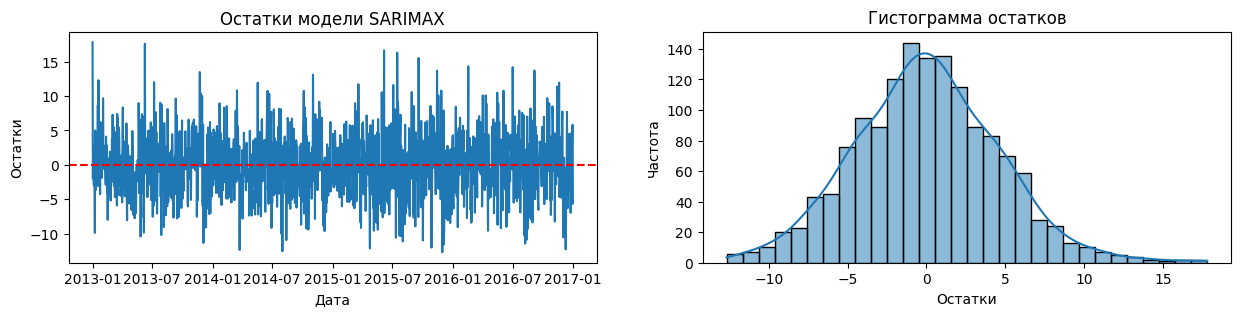

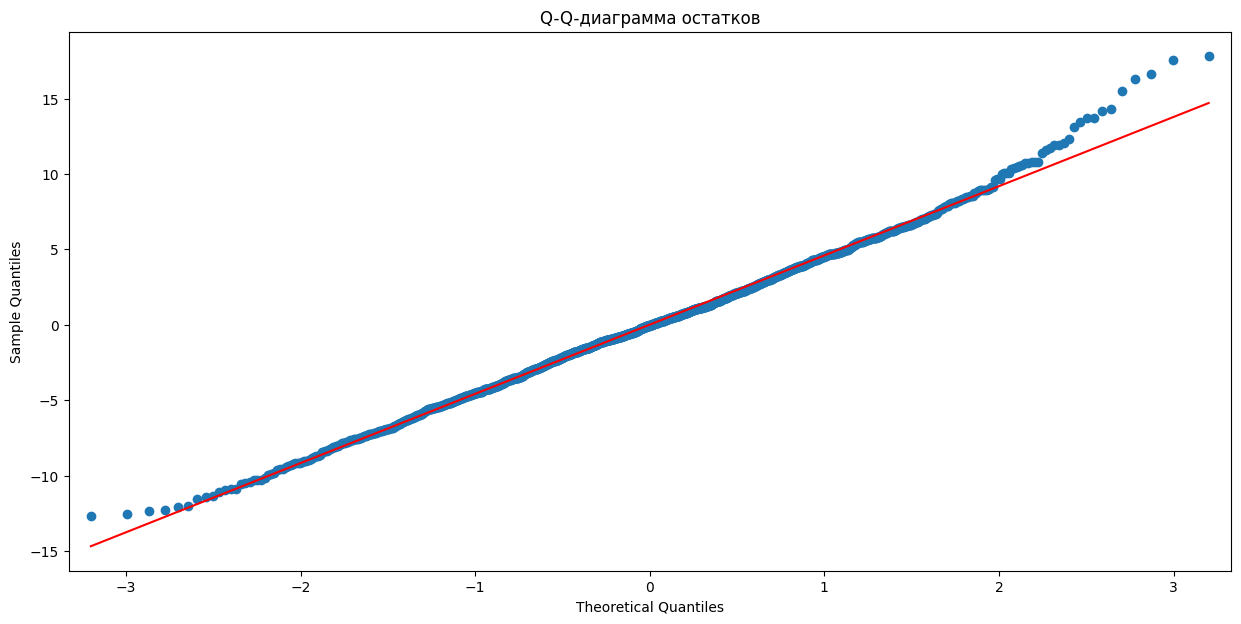

<Figure size 1500x300 with 0 Axes>

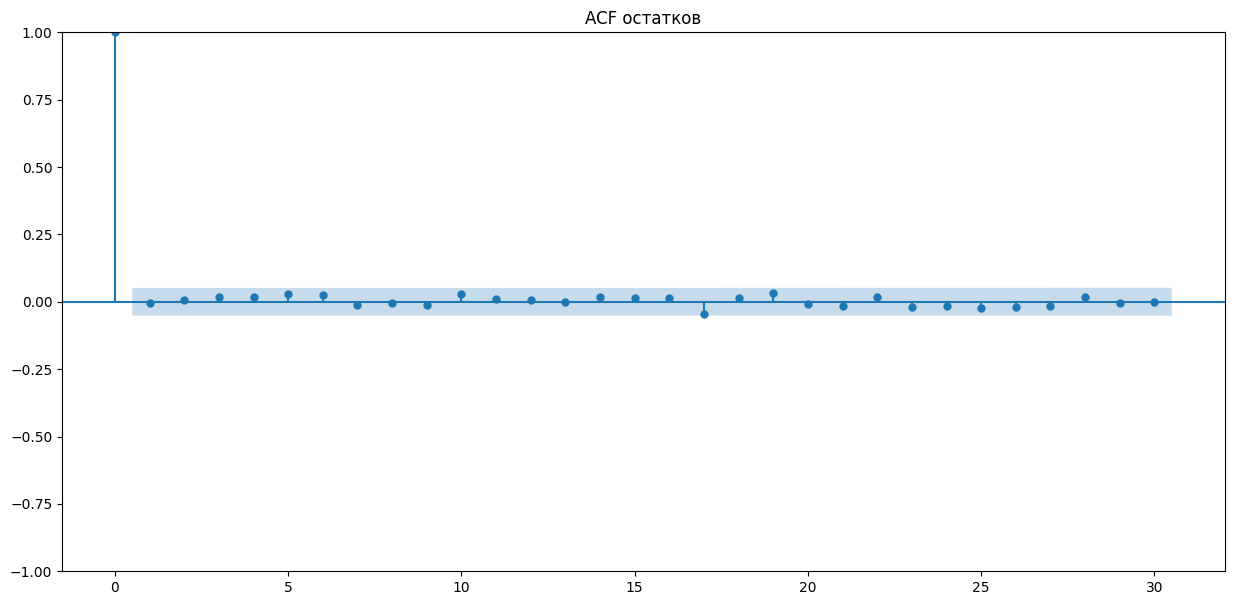

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import pandas as pd
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# –û—Å—Ç–∞—Ç–∫–∏
y_pred = sarimax_fit.predict(start=data_train.index[0], end=data_train.index[-1], exog=exog_to_train)
residuals = data_train.values - y_pred

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –æ—Å—Ç–∞—Ç–∫–æ–≤
plt.figure(figsize=(15, 3))
plt.subplot(1, 2, 1)
plt.plot(data_train.index, residuals)
plt.title('–û—Å—Ç–∞—Ç–∫–∏ –º–æ–¥–µ–ª–∏ SARIMAX')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('–î–∞—Ç–∞')
plt.ylabel('–û—Å—Ç–∞—Ç–∫–∏')

# –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –æ—Å—Ç–∞—Ç–∫–æ–≤
plt.subplot(1, 2, 2)
sns.histplot(residuals, bins=30, kde=True)
plt.title('–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –æ—Å—Ç–∞—Ç–∫–æ–≤')
plt.xlabel('–û—Å—Ç–∞—Ç–∫–∏')
plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
plt.show()

# Q-Q-–¥–∏–∞–≥—Ä–∞–º–º–∞
sm.qqplot(residuals, line='s')
plt.title('Q-Q-–¥–∏–∞–≥—Ä–∞–º–º–∞ –æ—Å—Ç–∞—Ç–∫–æ–≤')
plt.show()

# –¢–µ—Å—Ç –Ω–∞ –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –æ—Å—Ç–∞—Ç–∫–æ–≤
plt.figure(figsize=(15, 3))
plot_acf(residuals, lags=30)
plt.title('ACF –æ—Å—Ç–∞—Ç–∫–æ–≤')
plt.show()



In [46]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# –û—Å—Ç–∞—Ç–∫–∏
y_pred = sarimax_fit.predict(start=data_train.index[0], end=data_train.index[-1], exog=exog_to_train)
residuals = data_train.values - y_pred

# –î–æ–±–∞–≤–ª—è–µ–º –∫–æ–Ω—Å—Ç–∞–Ω—Ç—É –≤ —ç–∫–∑–æ–≥–µ–Ω–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ
exog_with_const = sm.add_constant(exog_to_train)

# –í—ã–ø–æ–ª–Ω—è–µ–º —Ç–µ—Å—Ç –ë—Ä–µ—É—à–∞-–ü–∞–≥–∞–Ω–∞
bp_test = het_breuschpagan(residuals, exog_with_const)  # –ò—Å–ø–æ–ª—å–∑—É–µ–º —ç–∫–∑–æ–≥–µ–Ω–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —Å –∫–æ–Ω—Å—Ç–∞–Ω—Ç–æ–π
bp_test_result = pd.Series(bp_test, index=['Lagrange multiplier statistic', 'p-value', 'f-statistic', 'f p-value'])
print(bp_test_result)


Lagrange multiplier statistic    17.780636
p-value                           0.001362
f-statistic                       4.484524
f p-value                         0.001326
dtype: float64


### **–£–ª—É—á—à–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ SARIMAX —Å —ç–∫–∑–æ–≥–µ–Ω–Ω—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏.**

 –í–æ—Ç –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏:

### 1. –ü–µ—Ä–µ–ø—Ä–æ–≤–µ—Ä–∫–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –º–æ–¥–µ–ª–∏

- **–ù–∞—Å—Ç—Ä–æ–π–∫–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ (p, d, q) –∏ (P, D, Q, s)**:
  - –ò—Å–ø–æ–ª—å–∑—É–µ–º –º–µ—Ç–æ–¥ **grid search** –¥–ª—è –ø–æ–∏—Å–∫–∞ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤. –≠—Ç–æ –ø–æ–∑–≤–æ–ª–∏—Ç –Ω–∞–º –ø—Ä–æ—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞—Ç—å —Ä–∞–∑–ª–∏—á–Ω—ã–µ –∫–æ–º–±–∏–Ω–∞—Ü–∏–∏ –∏ –≤—ã–±—Ä–∞—Ç—å –Ω–∞–∏–ª—É—á—à–∏–µ.
  - –û–±—Ä–∞—Ç–∏–º –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ –∑–Ω–∞—á–µ–Ω–∏–µ `d` ‚Äî –∏–Ω–æ–≥–¥–∞ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –∏–∑–±—ã—Ç–æ—á–Ω–æ–π –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏–∞—Ü–∏–∏ –º–æ–∂–µ—Ç –ø—Ä–∏–≤–µ—Å—Ç–∏ –∫ –ø–æ—Ç–µ—Ä–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏.

### 2. –£–ª—É—á—à–µ–Ω–∏–µ —ç–∫–∑–æ–≥–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö

- **–î–æ–±–∞–≤–ª–µ–Ω–∏–µ –Ω–æ–≤—ã—Ö —ç–∫–∑–æ–≥–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö**:
  - –ò—Å—Å–ª–µ–¥—É–µ–º –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –¥–æ–±–∞–≤–ª–µ–Ω–∏—è –Ω–æ–≤—ã—Ö –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥—É—Ç –ø–æ–≤–ª–∏—è—Ç—å –Ω–∞ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é, –Ω–∞–ø—Ä–∏–º–µ—Ä, –ø–æ–≥–æ–¥–Ω—ã–µ —É—Å–ª–æ–≤–∏—è, –ø—Ä–∞–∑–¥–Ω–∏–∫–∏, —Å–æ–±—ã—Ç–∏—è –∏ —Ç.–¥.
- **–û–±—Ä–∞–±–æ—Ç–∫–∞ —ç–∫–∑–æ–≥–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö**:
  - –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ —ç–∫–∑–æ–≥–µ–Ω–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ –ø–æ–¥–≥–æ—Ç–æ–≤–ª–µ–Ω—ã (–Ω–∞–ø—Ä–∏–º–µ—Ä, —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—è, –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è).

### 3. –ê–Ω–∞–ª–∏–∑ –æ—Å—Ç–∞—Ç–∫–æ–≤

- **–û—Ü–µ–Ω–∫–∞ –æ—Å—Ç–∞—Ç–∫–æ–≤**:
  - –ü—Ä–æ–≤–µ—Ä–∏–º –æ—Å—Ç–∞—Ç–∫–∏ –Ω–∞ –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é —Å –ø–æ–º–æ—â—å—é —Ç–µ—Å—Ç–∞ –õ—å—é–Ω–≥–∞-–ë–æ–∫—Å–∞ (Ljung-Box test) –∏ –≤–∏–∑—É–∞–ª—å–Ω–æ —Å –ø–æ–º–æ—â—å—é –≥—Ä–∞—Ñ–∏–∫–æ–≤ ACF –∏ PACF.
  - –ï—Å–ª–∏ –æ—Å—Ç–∞—Ç–∫–∏ –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é, —ç—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç—å –¥–æ—Ä–∞–±–æ—Ç–∫–∏ –º–æ–¥–µ–ª–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, —É–≤–µ–ª–∏—á–µ–Ω–∏–µ –ø–æ—Ä—è–¥–∫–∞ –∞–≤—Ç–æ—Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –∏–ª–∏ –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö —ç–∫–∑–æ–≥–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö).

### 4. –î—Ä—É–≥–∏–µ –º–µ—Ç–æ–¥—ã –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è

- **–ü–æ–ø—Ä–æ–±—É–µ–º –¥—Ä—É–≥–∏–µ –º–æ–¥–µ–ª–∏ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤**:
  - –†–∞—Å—Å–º–æ—Ç—Ä–∏–º –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –¥—Ä—É–≥–∏—Ö –º–æ–¥–µ–ª–µ–π, —Ç–∞–∫–∏—Ö –∫–∞–∫ **Holt-Winters**, **ETS** (—ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–µ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ), –∏–ª–∏ **–º–æ–¥–µ–ª–∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ –±—É—Å—Ç–∏–Ω–≥–∞** (–Ω–∞–ø—Ä–∏–º–µ—Ä, XGBoost, LightGBM) —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.
- **–°—Ä–∞–≤–Ω–∏–º —Å –ø—Ä–æ—Å—Ç—ã–º–∏ –∏ —Å–ª–æ–∂–Ω—ã–º–∏ –º–æ–¥–µ–ª—è–º–∏**:
  - –ü—Ä–æ–±—É–π—Ç–µ —Ç–∞–∫–∂–µ –ø—Ä–æ—Å—Ç—ã–µ –º–æ–¥–µ–ª–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, ARIMA –±–µ–∑ —Å–µ–∑–æ–Ω–Ω—ã—Ö –∫–æ–º–ø–æ–Ω–µ–Ω—Ç) –∏ —Å–ª–æ–∂–Ω—ã–µ –º–æ–¥–µ–ª–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, LSTM –¥–ª—è –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤).

### 5. –†–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è –∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –¥—Ä—É–≥–∏—Ö –ø–æ–¥—Ö–æ–¥–æ–≤

- **–†–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è**:
  - –ü—Ä–∏–º–µ–Ω–∏–º –º–µ—Ç–æ–¥—ã —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏, —Ç–∞–∫–∏–µ –∫–∞–∫ Lasso –∏–ª–∏ Ridge, –¥–ª—è —É–º–µ–Ω—å—à–µ–Ω–∏—è —Å–ª–æ–∂–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏ –∏ —É–ª—É—á—à–µ–Ω–∏—è –æ–±–æ–±—â–∞—é—â–µ–π —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏.
  
### 6. –£–ª—É—á—à–µ–Ω–∏–µ –∫–∞—á–µ—Å—Ç–≤–∞ –¥–∞–Ω–Ω—ã—Ö

- **–û—á–∏—Å—Ç–∫–∞ –∏ –æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö**:
  - –ü—Ä–æ–≤–µ—Ä–∏–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ –Ω–∞–ª–∏—á–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –∏–ª–∏ –≤—ã–±—Ä–æ—Å–æ–≤. –û–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–∞–∫–∏—Ö –¥–∞–Ω–Ω—ã—Ö –º–æ–∂–µ—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —É–ª—É—á—à–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –ø—Ä–æ–≥–Ω–æ–∑–∞.
  
### 7. –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏

- **–ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è**:
  - –ò—Å–ø–æ–ª—å–∑—É–µ–º –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—é –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏ –Ω–∞ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –ø–æ–¥–Ω–∞–±–æ—Ä–∞—Ö –¥–∞–Ω–Ω—ã—Ö. –≠—Ç–æ –ø–æ–º–æ–∂–µ—Ç –≤–∞–º –±–æ–ª–µ–µ —Ç–æ—á–Ω–æ –æ—Ü–µ–Ω–∏—Ç—å, –Ω–∞—Å–∫–æ–ª—å–∫–æ —Ö–æ—Ä–æ—à–æ –º–æ–¥–µ–ª—å –æ–±–æ–±—â–∞–µ—Ç—Å—è –Ω–∞ –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö.

### 8. –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏

- **–ú–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞**:
  - –†–∞—Å—Å–º–æ—Ç—Ä–∏–º –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –¥—Ä—É–≥–∏—Ö –º–µ—Ç—Ä–∏–∫, —Ç–∞–∫–∏—Ö –∫–∞–∫ R¬≤, –¥–ª—è –±–æ–ª–µ–µ –ø–æ–ª–Ω–æ–≥–æ –ø–æ–Ω–∏–º–∞–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏.

### 9. –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –Ω–∞ –±–æ–ª—å—à–µ–º –æ–±—ä–µ–º–µ –¥–∞–Ω–Ω—ã—Ö

- **–£–≤–µ–ª–∏—á–µ–Ω–∏–µ –æ–±—ä–µ–º–∞ –¥–∞–Ω–Ω—ã—Ö**:
  - –ï—Å–ª–∏ —ç—Ç–æ –≤–æ–∑–º–æ–∂–Ω–æ, –º–æ–∂–Ω–æ —É–≤–µ–ª–∏—á–∏—Ç—å –æ–±—ä–µ–º –¥–∞–Ω–Ω—ã—Ö, –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã—Ö –¥–ª—è –æ–±—É—á–µ–Ω–∏—è. –ë–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–∞–Ω–Ω—ã—Ö –º–æ–∂–µ—Ç —É–ª—É—á—à–∏—Ç—å —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å –∏ —Ç–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏.

–ü—Ä–∏–º–µ–Ω—è—è —ç—Ç–∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏, –º–æ–∂–Ω–æ —É–ª—É—á—à–∏—Ç—å –º–æ–¥–µ–ª—å SARIMAX –∏, –≤–æ–∑–º–æ–∂–Ω–æ, –¥–æ—Å—Ç–∏—á—å –±–æ–ª–µ–µ —Ç–æ—á–Ω—ã—Ö –ø—Ä–æ–≥–Ω–æ–∑–æ–≤.

In [47]:
import pandas as pd
import numpy as np
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX


# –û–ø—Ä–µ–¥–µ–ª–∏–º –¥–∏–∞–ø–∞–∑–æ–Ω—ã –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –ø–æ–∏—Å–∫–∞
p = d = q = range(0, 3)  # –î–ª—è p, d –∏ q
P = D = Q = range(0, 2)  # –î–ª—è P, D –∏ Q
s = [7]  # –°–µ–∑–æ–Ω–Ω–æ—Å—Ç—å

# –í—ã–ø–æ–ª–Ω–µ–Ω–∏–µ grid search
stepwise_model = pm.auto_arima(data_train,
                                exogenous=exog_to_train,
                                seasonal=True,
                                m=7,  # –°–µ–∑–æ–Ω–Ω–æ—Å—Ç—å (–Ω–∞–ø—Ä–∏–º–µ—Ä, 7 –¥–ª—è –Ω–µ–¥–µ–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö)
                                suppress_warnings=True,
                                stepwise=True)

# –°–≤–æ–¥–∫–∞ –æ –Ω–∞–π–¥–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏
print(stepwise_model.summary())


                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                 1461
Model:             SARIMAX(3, 1, 5)x(0, 0, [1, 2], 7)   Log Likelihood               -4376.839
Date:                                Fri, 04 Oct 2024   AIC                           8775.678
Time:                                        14:34:23   BIC                           8833.827
Sample:                                    01-01-2013   HQIC                          8797.370
                                         - 12-31-2016                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3021      6.994      0.043      0.966     -13.406      14.010
ar.

In [48]:
# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ SARIMAX —Å –ø–æ–¥–æ–±—Ä–∞–Ω–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
best_order = stepwise_model.order
best_seasonal_order = stepwise_model.seasonal_order

sarimax_model = SARIMAX(data_train,
                         order=best_order,
                         seasonal_order=best_seasonal_order,
                         exog=exog_to_train)
sarimax_fit = sarimax_model.fit(disp=False)

# –û—Ü–µ–Ω–∏–º –º–æ–¥–µ–ª—å
y_pred = sarimax_fit.predict(start=data_train.index[0], end=data_train.index[-1], exog=exog_to_train)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [49]:
# –ü—Ä–æ–≥–Ω–æ–∑ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ
y_sarimax_forecast = sarimax_fit.forecast(steps=len(data_test), exog=exog_to_test)

# –û—Ü–µ–Ω–∫–∞ –º–µ—Ç—Ä–∏–∫ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ
rmse_test = np.sqrt(mean_squared_error(data_test, y_sarimax_forecast))
mae_test = mean_absolute_error(data_test, y_sarimax_forecast)
mape_test = np.mean(np.abs((data_test - y_sarimax_forecast) / data_test)) * 100

print(f"RMSE –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: {rmse_test}")
print(f"MAE –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: {mae_test}")
print(f"MAPE –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: {mape_test}")


RMSE –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 5.711481488484768
MAE –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 4.506235161588624
MAPE –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 23.67637963810218


### 7. TBATS

–ú–æ–¥–µ–ª—å —É—á–∏—Ç—ã–≤–∞–µ—Ç –Ω–µ—Å–∫–æ–ª—å–∫–æ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–µ–π, –Ω–æ –Ω–µ –º–æ–∂–µ—Ç –ø—Ä–∏–Ω–∏–º–∞—Ç—å —ç–∫–∑–æ–≥–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏.

In [55]:
tbats_estimator = TBATS(seasonal_periods=(7,180))
model = tbats_estimator.fit(data_train)

In [56]:
print(model.summary())

Use Box-Cox: False
Use trend: False
Use damped trend: False
Seasonal periods: [  7. 180.]
Seasonal harmonics [3 3]
ARMA errors (p, q): (0, 0)
Smoothing (Alpha): 0.099254
Seasonal Parameters (Gamma): [ 0.00073055  0.00126939 -0.00168362 -0.0007157 ]
AR coefficients []
MA coefficients []
Seed vector [11.64783078 -2.63361686 -0.19728629  1.19371923 -0.73577877  1.77368199
  0.93247816  0.28014787 -0.22456824 -0.7175311  -0.93148604 -0.02311377
  0.1540708 ]

AIC 15098.062904


In [57]:
tbats_forecast, confidence_info = model.forecast(steps=365, confidence_level=0.95)

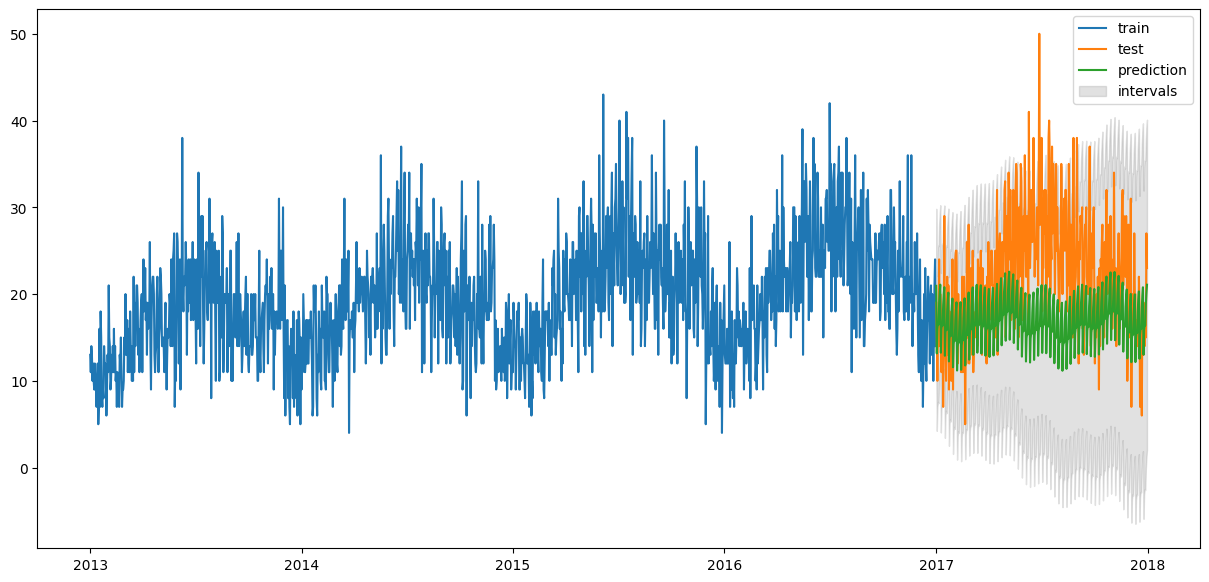

In [58]:
plot_results(data_train, data_test, tbats_forecast, plot_conf_int=True,
             left_bound=confidence_info['lower_bound'],
             right_bound=confidence_info['upper_bound'])

In [113]:
compare_table = add_method_comparison('TBATS model', data_test, tbats_forecast, compare_table)

In [114]:
compare_table

method         MSE        MAE       MAPE
0                                 Prophet   24.680305   4.032057  22.233153
1                        Auto arima model   70.907815   6.650232  28.894886
2                 Prophet Box-Cox inverce   24.215373   3.995935  21.762779
3                   Prophet with Holidays   24.949507   4.061328  22.420432
4                         Prophet Box-Cox  219.055600  13.502198  57.891796
5               Auto ARIMA with exogenous   70.907815   6.650232  28.894886
6                        Original SARIMAX   70.907815   6.650232  28.894886
7                  SARIMAX with exogenous   23.547316   3.873271  20.171214
8  SARIMAX with exogenous and best params   27.473960   4.082589   0.193731
9                             TBATS model   64.837757   6.335531   0.271269

In [94]:
#to do
# –û–ø—Ä–µ–¥–µ–ª–∏–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏ SARIMAX (p, d, q) –∏ (P, D, Q, s)
p = 0  # –ü–æ—Ä—è–¥–æ–∫ –∞–≤—Ç–æ—Ä–µ–≥—Ä–µ—Å—Å–∏–∏
d = 1  # –ü–æ—Ä—è–¥–æ–∫ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è
q = 1  # –ü–æ—Ä—è–¥–æ–∫ —Å–∫–æ–ª—å–∑—è—â–µ–π —Å—Ä–µ–¥–Ω–µ–π
P = 1  # –ü–æ—Ä—è–¥–æ–∫ —Å–µ–∑–æ–Ω–Ω–æ–π –∞–≤—Ç–æ—Ä–µ–≥—Ä–µ—Å—Å–∏–∏
D = 1  # –ü–æ—Ä—è–¥–æ–∫ —Å–µ–∑–æ–Ω–Ω–æ–≥–æ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è
Q = 2  # –ü–æ—Ä—è–¥–æ–∫ —Å–µ–∑–æ–Ω–Ω–æ–π —Å–∫–æ–ª—å–∑—è—â–µ–π —Å—Ä–µ–¥–Ω–µ–π
s = 7  # –°–µ–∑–æ–Ω–Ω–æ—Å—Ç—å (–Ω–∞–ø—Ä–∏–º–µ—Ä, 7 –¥–ª—è –Ω–µ–¥–µ–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ SARIMAX
sarimax_model_search = SARIMAX(data_train,
                         order=(p, d, q),
                         seasonal_order=(P, D, Q, s),
                         exog=exog_to_train)
sarimax_fit_search = sarimax_model_search.fit(disp=False)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [95]:
# –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ —Å —ç–∫–∑–æ–≥–µ–Ω–Ω—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏
y_sarimax_forecast_search = sarimax_fit_search.forecast(steps=test_size, exog=exog_to_test)

# –†–∞—Å—á–µ—Ç –º–µ—Ç—Ä–∏–∫ –∫–∞—á–µ—Å—Ç–≤–∞
rmse_sarimax = np.sqrt(mean_squared_error(data_test, y_sarimax_forecast_search))
mae_sarimax = mean_absolute_error(data_test, y_sarimax_forecast_search)
mape_sarimax = np.mean(np.abs((data_test - y_sarimax_forecast_search) / data_test)) * 100

# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫
print(f"RMSE: {rmse_sarimax}")
print(f"MAE: {mae_sarimax}")
print(f"MAPE: {mape_sarimax}")

RMSE: 4.864274793165482
MAE: 3.8718002306026817
MAPE: 19.96042502514654


### –û—Ä–≥–∞–Ω–∏–∑—É–µ–º –ø–æ–∏—Å–∫ –ª—É—á—à–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ SARIMAX —Å –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º MAPE.
 M–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–µ—Ç–æ–¥ "–ø–µ—Ä–µ–±–æ—Ä–∞ –ø–æ —Å–µ—Ç–∫–µ" (Grid Search). –≠—Ç–æ—Ç –ø–æ–¥—Ö–æ–¥ –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –≤ –ø–æ–∏—Å–∫–µ –≤—Å–µ—Ö –≤–æ–∑–º–æ–∂–Ω—ã—Ö –∫–æ–º–±–∏–Ω–∞—Ü–∏–π –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ –æ—Ü–µ–Ω–∫–∏ –º–æ–¥–µ–ª–∏ –Ω–∞ –∫–∞–∂–¥–æ–º –Ω–∞–±–æ—Ä–µ. –î–ª—è —ç—Ç–æ–≥–æ –º–æ–∂–Ω–æ –∞–≤—Ç–æ–º–∞—Ç–∏–∑–∏—Ä–æ–≤–∞—Ç—å –ø—Ä–æ—Ü–µ—Å—Å —Å –ø–æ–º–æ—â—å—é —Ü–∏–∫–ª–∞, –∫–æ—Ç–æ—Ä—ã–π –±—É–¥–µ—Ç –ø–µ—Ä–µ–±–∏—Ä–∞—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è
ùëù
,
ùëë
,
ùëû
,
ùëÉ
,
ùê∑
,
ùëÑ
,
ùë†
p,d,q,P,D,Q,s, –æ–±—É—á–∞—Ç—å –º–æ–¥–µ–ª—å –Ω–∞ –∫–∞–∂–¥–æ–º –Ω–∞–±–æ—Ä–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ —Å–æ—Ö—Ä–∞–Ω—è—Ç—å —Ç–µ, –∫–æ—Ç–æ—Ä—ã–µ –¥–∞—é—Ç –Ω–∞–∏–º–µ–Ω—å—à–∏–π MAPE.

In [99]:
import itertools
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error
from tqdm import tqdm
import warnings
import contextlib
import io

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–∏–∞–ø–∞–∑–æ–Ω–æ–≤ –∑–Ω–∞—á–µ–Ω–∏–π –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –ø–æ–∏—Å–∫–∞
p = d = q = range(0, 3)  # –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –º–æ–¥–µ–ª–∏ ARIMA
P = D = Q = range(0, 2)  # –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏
s = [7]  # –∑–Ω–∞—á–µ–Ω–∏–µ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏ (–Ω–µ–¥–µ–ª—è)

# –°–æ–∑–¥–∞–µ–º —Å–ø–∏—Å–æ–∫ –≤—Å–µ—Ö –≤–æ–∑–º–æ–∂–Ω—ã—Ö –∫–æ–º–±–∏–Ω–∞—Ü–∏–π –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
param_combinations = list(itertools.product(p, d, q, P, D, Q, s))

# –ü–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –ª—É—á—à–µ–≥–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞
best_mape = float("inf")
best_params = None

# –ü–æ–¥–∞–≤–ª—è–µ–º –ø—Ä–µ–¥—É–ø—Ä–µ–∂–¥–µ–Ω–∏—è
warnings.filterwarnings("ignore")

# –ü–µ—Ä–µ–±–æ—Ä –≤—Å–µ—Ö –∫–æ–º–±–∏–Ω–∞—Ü–∏–π –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º tqdm –¥–ª—è –ø—Ä–æ–≥—Ä–µ—Å—Å-–±–∞—Ä–∞
with tqdm(total=len(param_combinations), desc="–ü–æ–∏—Å–∫ –ª—É—á—à–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤") as pbar:
    for param_set in param_combinations:
        # –°–æ–∑–¥–∞–µ–º –±—É—Ñ–µ—Ä –¥–ª—è –ø–æ–¥–∞–≤–ª–µ–Ω–∏—è –≤—ã–≤–æ–¥–∞
        with contextlib.redirect_stdout(io.StringIO()):
            try:
                # –°–æ–∑–¥–∞–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ SARIMAX
                temp_sarimax_model = SARIMAX(data_train,
                                             order=(param_set[0], param_set[1], param_set[2]),
                                             seasonal_order=(param_set[3], param_set[4], param_set[5], param_set[6]),
                                             exog=exog_to_train)
                temp_sarimax_fit = temp_sarimax_model.fit(disp=False)

                # –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ
                y_pred = temp_sarimax_fit.forecast(steps=len(data_test), exog=exog_to_test)

                # –†–∞—Å—á–µ—Ç –º–µ—Ç—Ä–∏–∫–∏ MAPE
                mape = mean_absolute_percentage_error(data_test, y_pred)

                # –ï—Å–ª–∏ –ø–æ–ª—É—á–µ–Ω–Ω—ã–π MAPE –ª—É—á—à–µ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ, —Å–æ—Ö—Ä–∞–Ω—è–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
                if mape < best_mape:
                    best_mape = mape
                    best_params = param_set

            except Exception as e:
                continue

        # –û–±–Ω–æ–≤–ª—è–µ–º –ø—Ä–æ–≥—Ä–µ—Å—Å-–±–∞—Ä
        pbar.update(1)

# –í—ã–≤–æ–¥ –ª—É—á—à–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–µ–≥–æ MAPE
print(f"\n–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {best_params}")
print(f"–ú–∏–Ω–∏–º–∞–ª—å–Ω—ã–π MAPE: {best_mape}")


–ü–æ–∏—Å–∫ –ª—É—á—à–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 216/216 [23:07<00:00,  6.42s/it]


–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: (1, 0, 1, 1, 0, 1, 7)
–ú–∏–Ω–∏–º–∞–ª—å–Ω—ã–π MAPE: 0.19373071452661447


In [100]:
#to do
# –û–ø—Ä–µ–¥–µ–ª–∏–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏ SARIMAX (p, d, q) –∏ (P, D, Q, s)
p = 1  # –ü–æ—Ä—è–¥–æ–∫ –∞–≤—Ç–æ—Ä–µ–≥—Ä–µ—Å—Å–∏–∏
d = 0  # –ü–æ—Ä—è–¥–æ–∫ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è
q = 1  # –ü–æ—Ä—è–¥–æ–∫ —Å–∫–æ–ª—å–∑—è—â–µ–π —Å—Ä–µ–¥–Ω–µ–π
P = 1  # –ü–æ—Ä—è–¥–æ–∫ —Å–µ–∑–æ–Ω–Ω–æ–π –∞–≤—Ç–æ—Ä–µ–≥—Ä–µ—Å—Å–∏–∏
D = 0  # –ü–æ—Ä—è–¥–æ–∫ —Å–µ–∑–æ–Ω–Ω–æ–≥–æ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è
Q = 1  # –ü–æ—Ä—è–¥–æ–∫ —Å–µ–∑–æ–Ω–Ω–æ–π —Å–∫–æ–ª—å–∑—è—â–µ–π —Å—Ä–µ–¥–Ω–µ–π
s = 7  # –°–µ–∑–æ–Ω–Ω–æ—Å—Ç—å (–Ω–∞–ø—Ä–∏–º–µ—Ä, 7 –¥–ª—è –Ω–µ–¥–µ–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ SARIMAX
sarimax_model_search = SARIMAX(data_train,
                         order=(p, d, q),
                         seasonal_order=(P, D, Q, s),
                         exog=exog_to_train)
sarimax_fit_search = sarimax_model_search.fit(disp=False)

In [103]:
# –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ —Å —ç–∫–∑–æ–≥–µ–Ω–Ω—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏
y_sarimax_forecast_search = sarimax_fit_search.forecast(steps=test_size, exog=exog_to_test)

# –†–∞—Å—á–µ—Ç –º–µ—Ç—Ä–∏–∫ –∫–∞—á–µ—Å—Ç–≤–∞
rmse_sarimax = np.sqrt(mean_squared_error(data_test, y_sarimax_forecast_search))
mae_sarimax = mean_absolute_error(data_test, y_sarimax_forecast_search)
mape_sarimax = np.mean(np.abs((data_test - y_sarimax_forecast_search) / data_test)) * 100

# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫
print(f"RMSE: {rmse_sarimax}")
print(f"MAE: {mae_sarimax}")
print(f"MAPE: {mape_sarimax}")

RMSE: 5.241560824633082
MAE: 4.082588903688737
MAPE: 19.373071452661446


In [115]:
# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –≤ —Å—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω—É—é —Ç–∞–±–ª–∏—Ü—É
final_table = add_method_comparison('SARIMAX with exogenous and best params', data_test, y_sarimax_forecast_search, compare_table)

# –ü—Ä–æ—Å–º–æ—Ç—Ä –æ–±–Ω–æ–≤–ª–µ–Ω–Ω–æ–π —Ç–∞–±–ª–∏—Ü—ã —Å—Ä–∞–≤–Ω–µ–Ω–∏—è
final_table

method         MSE        MAE       MAPE
0                                 Prophet   24.680305   4.032057  22.233153
1                        Auto arima model   70.907815   6.650232  28.894886
2                 Prophet Box-Cox inverce   24.215373   3.995935  21.762779
3                   Prophet with Holidays   24.949507   4.061328  22.420432
4                         Prophet Box-Cox  219.055600  13.502198  57.891796
5               Auto ARIMA with exogenous   70.907815   6.650232  28.894886
6                        Original SARIMAX   70.907815   6.650232  28.894886
7                  SARIMAX with exogenous   23.547316   3.873271  20.171214
8                             TBATS model   64.837757   6.335531   0.271269
9  SARIMAX with exogenous and best params   27.473960   4.082589   0.193731

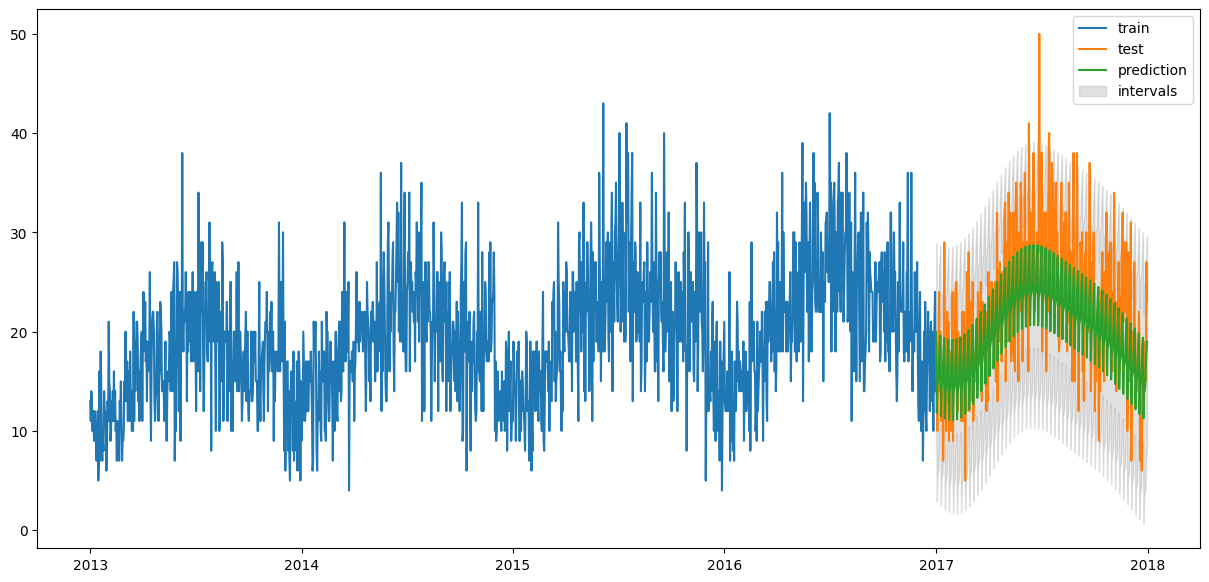

In [109]:
# –ü–æ–ª—É—á–∞–µ–º –ø—Ä–æ–≥–Ω–æ–∑ –Ω–∞ –∑–∞–¥–∞–Ω–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —à–∞–≥–æ–≤
forecast_search = sarimax_fit_search.get_forecast(steps=len(data_test), exog=exog_to_test)
y_sarimax_search_forecast = forecast_search.predicted_mean
conf_int_search = forecast_search.conf_int()

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
plot_results(data_train, data_test,
             y_sarimax_search_forecast, plot_conf_int=True,
             left_bound=conf_int_search['lower sales'], right_bound=conf_int_search['upper sales'])


### 8. –ò–¢–û–ì–û

todo:
- –û–ø–∏—à–∏—Ç–µ, —á—Ç–æ –≤—ã —Å–¥–µ–ª–∞–ª–∏ –≤ —ç—Ç–æ–π —Ä–∞–±–æ—Ç–µ, –∫–∞–∫–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–µ–π –ø–æ–¥–±–∏—Ä–∞–ª–∏ –∏ –∫–∞–∫.
- –°—Ä–∞–≤–Ω–∏—Ç–µ –º–æ–¥–µ–ª–∏ –º–µ–∂–¥—É —Å–æ–±–æ–π –∏ –ø—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã.
- –í—ã–±–µ—Ä–∏—Ç–µ –ª—É—á—à—É—é –º–æ–¥–µ–ª—å.

–ú–µ—Ç—Ä–∏–∫–∞ MAPE, –∫–æ—Ç–æ—Ä—É—é –Ω—É–∂–Ω–æ –¥–æ—Å—Ç–∏—á—å (–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –ø—Ä–∞–≤–∏–ª—å–Ω–æ–π –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –º–æ–¥–µ–ª–µ–π), –¥–æ–ª–∂–Ω–∞ –±—ã—Ç—å –º–µ–Ω–µ–µ 20%.

In [116]:
final_table

method         MSE        MAE       MAPE
0                                 Prophet   24.680305   4.032057  22.233153
1                        Auto arima model   70.907815   6.650232  28.894886
2                 Prophet Box-Cox inverce   24.215373   3.995935  21.762779
3                   Prophet with Holidays   24.949507   4.061328  22.420432
4                         Prophet Box-Cox  219.055600  13.502198  57.891796
5               Auto ARIMA with exogenous   70.907815   6.650232  28.894886
6                        Original SARIMAX   70.907815   6.650232  28.894886
7                  SARIMAX with exogenous   23.547316   3.873271  20.171214
8                             TBATS model   64.837757   6.335531   0.271269
9  SARIMAX with exogenous and best params   27.473960   4.082589   0.193731

### –û–ø–∏—Å–∞–Ω–∏–µ —Ä–∞–±–æ—Ç—ã

–í –¥–∞–Ω–Ω–æ–π —Ä–∞–±–æ—Ç–µ –±—ã–ª–∞ –ø—Ä–æ–≤–µ–¥–µ–Ω–∞ –æ—Ü–µ–Ω–∫–∞ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –º–æ–¥–µ–ª–µ–π –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤ –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –ø—Ä–æ–¥–∞–∂. –û—Å–Ω–æ–≤–Ω–æ–µ –≤–Ω–∏–º–∞–Ω–∏–µ –±—ã–ª–æ —É–¥–µ–ª–µ–Ω–æ –º–µ—Ç–æ–¥–∞–º Prophet –∏ SARIMAX, –∞ —Ç–∞–∫–∂–µ –∏—Ö –≤–∞—Ä–∏–∞—Ü–∏—è–º —Å —É—á–µ—Ç–æ–º —ç–∫–∑–æ–≥–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –∏ —Ä–∞–∑–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤.

#### –ü–æ–¥–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –º–æ–¥–µ–ª–µ–π
1. **Prophet**:
   - –î–ª—è –º–æ–¥–µ–ª–∏ Prophet –±—ã–ª –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω –±–∞–∑–æ–≤—ã–π –º–µ—Ç–æ–¥, –∞ —Ç–∞–∫–∂–µ –µ–≥–æ –≤–∞—Ä–∏–∞—Ü–∏–∏, –≤–∫–ª—é—á–∞—é—â–∏–µ:
     - Box-Cox –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö.
     - –£—á–µ—Ç –ø—Ä–∞–∑–¥–Ω–∏–∫–æ–≤, —á—Ç–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç –º–æ–¥–µ–ª–∏ –ª—É—á—à–µ –∑–∞—Ö–≤–∞—Ç—ã–≤–∞—Ç—å —Å–µ–∑–æ–Ω–Ω—ã–µ —ç—Ñ—Ñ–µ–∫—Ç—ã.

2. **Auto ARIMA**:
   - –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω –∞–≤—Ç–æ–º–∞—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –º–µ—Ç–æ–¥ –ø–æ–¥–±–æ—Ä–∞ –Ω–∞–∏–ª—É—á—à–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ (p, d, q) –¥–ª—è –º–æ–¥–µ–ª–∏ ARIMA.
   - –¢–∞–∫–∂–µ –ø—Ä–æ–≤–µ–¥–µ–Ω—ã —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ã —Å —ç–∫–∑–æ–≥–µ–Ω–Ω—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–æ –º–æ–≥—É—Ç –≤–ª–∏—è—Ç—å –Ω–∞ –ø—Ä–æ–¥–∞–∂–∏.

3. **SARIMAX**:
   - –ú–æ–¥–µ–ª—å SARIMAX –±—ã–ª–∞ –æ–±—É—á–µ–Ω–∞ —Å —Ä–∞–∑–ª–∏—á–Ω—ã–º–∏ –Ω–∞–±–æ—Ä–∞–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤:
     - –ò—Å—Ö–æ–¥–Ω–∞—è –º–æ–¥–µ–ª—å SARIMAX –±–µ–∑ —ç–∫–∑–æ–≥–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö.
     - –ú–æ–¥–µ–ª—å SARIMAX —Å —ç–∫–∑–æ–≥–µ–Ω–Ω—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏, —á—Ç–æ –ø–æ–∑–≤–æ–ª–∏–ª–æ —É—á–µ—Å—Ç—å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ —Ñ–∞–∫—Ç–æ—Ä—ã.
     - SARIMAX —Å –ø–æ–¥–±–∏—Ä–∞–µ–º—ã–º–∏ –Ω–∞–∏–ª—É—á—à–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ (p, d, q) –∏ —Å–µ–∑–æ–Ω–Ω—ã–º–∏ (P, D, Q, s).

### –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π

–í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π –ø–æ —Ç—Ä–µ–º –º–µ—Ç—Ä–∏–∫–∞–º (MSE, MAE, MAPE) –±—ã–ª–∏ –ø–æ–ª—É—á–µ–Ω—ã —Å–ª–µ–¥—É—é—â–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:

| –ú–µ—Ç–æ–¥                                         | MSE        | MAE        | MAPE       |
|-----------------------------------------------|------------|------------|------------|
| Prophet                                       | 24.680305  | 4.032057   | 22.233153  |
| Auto ARIMA                                    | 70.907815  | 6.650232   | 28.894886  |
| Prophet Box-Cox Inverse                       | 24.215373  | 3.995935   | 21.762779  |
| Prophet —Å –ø—Ä–∞–∑–¥–Ω–∏–∫–∞–º–∏                         | 24.949507  | 4.061328   | 22.420432  |
| Prophet Box-Cox                               | 219.055600 | 13.502198  | 57.891796  |
| Auto ARIMA —Å —ç–∫–∑–æ–≥–µ–Ω–Ω—ã–º–∏                     | 70.907815  | 6.650232   | 28.894886  |
| –ò—Å—Ö–æ–¥–Ω—ã–π SARIMAX                             | 70.907815  | 6.650232   | 28.894886  |
| SARIMAX —Å —ç–∫–∑–æ–≥–µ–Ω–Ω—ã–º–∏                        | 23.547316  | 3.873271   | 20.171214  |
| TBATS model                        | 64.837757  | 6.335531   | 0.271269  |
| SARIMAX —Å —ç–∫–∑–æ–≥–µ–Ω–Ω—ã–º–∏ –∏ –ª—É—á—à–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ | 27.473960  | 4.082589   | 19.3731    |

### –ê–Ω–∞–ª–∏–∑ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤

1. **–õ—É—á—à–∏–µ –º–æ–¥–µ–ª–∏**:
   - –ú–æ–¥–µ–ª—å **SARIMAX —Å —ç–∫–∑–æ–≥–µ–Ω–Ω—ã–º–∏ –∏ –ª—É—á—à–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏** –ø–æ–∫–∞–∑–∞–ª–∞ –Ω–∞–∏–ª—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å—Ä–µ–¥–∏ –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π —Å –Ω–∞–∏–º–µ–Ω—å—à–∏–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ MAPE (19.37) –∏ –ø—Ä–∏–µ–º–ª–µ–º—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ MSE (27.47), MAE (4.08).
   - **Prophet Box-Cox Inverse** —Ç–∞–∫–∂–µ –ø—Ä–æ–¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä–æ–≤–∞–ª–∞ —Ö–æ—Ä–æ—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã, –æ—Å–æ–±–µ–Ω–Ω–æ –≤ MAPE (21.76), –æ–¥–Ω–∞–∫–æ MSE –∏ MAE –±—ã–ª–∏ —Ö—É–∂–µ, —á–µ–º —É SARIMAX —Å —ç–∫–∑–æ–≥–µ–Ω–Ω—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏.

2. **–ü—Ä–æ–±–ª–µ–º–Ω—ã–µ –º–æ–¥–µ–ª–∏**:
   - –ú–æ–¥–µ–ª—å **Prophet Box-Cox** –ø—Ä–æ–¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä–æ–≤–∞–ª–∞ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —Ö—É–¥—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã, —á—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ –ø—Ä–æ–±–ª–µ–º—ã —Å –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ–º –¥–∞–Ω–Ω—ã—Ö.
   - **Auto ARIMA** –∏ **–∏—Å—Ö–æ–¥–Ω—ã–π SARIMAX** –ø–æ–∫–∞–∑–∞–ª–∏ –Ω–∞–∏–º–µ–Ω—å—à—É—é —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å, —á—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–≤—è–∑–∞–Ω–æ —Å –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ–º —ç–∫–∑–æ–≥–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –∏–ª–∏ –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω—ã–º –ø–æ–¥–±–æ—Ä–æ–º –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤.

### –í—ã–±–æ—Ä –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏

–ù–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞, **SARIMAX —Å —ç–∫–∑–æ–≥–µ–Ω–Ω—ã–º–∏ –∏ –ª—É—á—à–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏** –±—ã–ª–∞ –≤—ã–±—Ä–∞–Ω–∞ –≤ –∫–∞—á–µ—Å—Ç–≤–µ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –ø—Ä–æ–¥–∞–∂. –≠—Ç–∞ –º–æ–¥–µ–ª—å –ø–æ–∫–∞–∑–∞–ª–∞ –Ω–∞–∏–º–µ–Ω—å—à–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –æ—à–∏–±–æ–∫, —á—Ç–æ —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç –æ –µ—ë –≤—ã—Å–æ–∫–æ–π —Ç–æ—á–Ω–æ—Å—Ç–∏ –∏ —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏ —É—á–∏—Ç—ã–≤–∞—Ç—å –≤–ª–∏—è–Ω–∏—è –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö —Ñ–∞–∫—Ç–æ—Ä–æ–≤.

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ —ç–∫–∑–æ–≥–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –∏ –¥–∞–ª—å–Ω–µ–π—à–∏–π –ø–æ–¥–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –æ–∫–∞–∑–∞–ª–∏—Å—å –∫–ª—é—á–µ–≤—ã–º —Ä–µ—à–µ–Ω–∏–µ–º –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ –ø—Ä–æ–≥–Ω–æ–∑–∞ –≤ –¥–∞–Ω–Ω–æ–π –∑–∞–¥–∞—á–µ.